In [1]:
from PIL import Image
import h5py
import anubisPlotUtils as anPlot
import json
import numpy as np
import os
import hist as hi
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg', etc.
import mplhep as hep
hep.style.use([hep.style.ATLAS])
import sys
import ANUBIS_triggered_functions as ANT
import pandas as pd
import matplotlib.backends.backend_pdf
from matplotlib.ticker import MultipleLocator
import plotly
import plotly.graph_objs as go
import plotly.express as px


%matplotlib inline

In [2]:
current_directory=  os.path.dirname(os.getcwd())

data = ANT.importDatafile(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_0227.h5")

In this code, I will attempt to update the reconstruction algorithm to decide whether a particle is trasvering ProANUBIS in the up or down vertical direction

In [3]:
data_ATLAS = [sublist[:94230] for sublist in data]

In [4]:
etaHits, phiHits = ANT.divideHitCountsByRPC_Timed(data_ATLAS)

In [5]:
#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_ATLAS = ANT.FindCoincidentHits(etaHits,phiHits,15)

#Spatial Clustering
coincident_hits_ATLAS_clustered = ANT.cluster(coincident_hits_ATLAS)

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0

In [9]:
print(coincident_hits_ATLAS_clustered[0])

['Event 1', 238, [[[[[0, 20, 239, 'phi']]], [[[0, 5, 253, 'eta'], [0, 6, 259, 'eta']]]], [[[[1, 18, 241, 'phi']], [[1, 20, 238, 'phi'], [1, 21, 240, 'phi'], [1, 22, 239, 'phi'], [1, 23, 240, 'phi'], [1, 24, 241, 'phi'], [1, 25, 242, 'phi'], [1, 26, 242, 'phi'], [1, 27, 243, 'phi'], [1, 28, 245, 'phi']], [[1, 30, 245, 'phi']]], [[[1, 3, 255, 'eta'], [1, 4, 254, 'eta'], [1, 5, 255, 'eta']]]], [[[[2, 20, 238, 'phi']]], [[[2, 3, 256, 'eta'], [2, 4, 253, 'eta']]]], [[], []], [[], []], [[], []]]]


In [6]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events = ANT.filter_events(coincident_hits_ATLAS_clustered,2,3)
print("......")
all_6_rpcs = ANT.filter_events(coincident_hits_ATLAS_clustered,3,6)

Number of events in filter = 27227
......
Number of events in filter = 1334


In [7]:
def extract_coords_timed(event,max_cluster_size):

    #This function converts spatially clusters in RPCs into x and y coordinates (z given by RPC number)
    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]

    #Extract x and y coords of cluster in event
    distance_per_phi_channel = 2.7625 #cm
    distance_per_eta_channel = 2.9844 #cm
    
    coords = []

    for RPC in range(6):
        
        x_clusters = [x for x in event[2][RPC][0] if len(x)<=max_cluster_size] #phi direction
        y_clusters = [y for y in event[2][RPC][1] if len(y)<=max_cluster_size] #eta direction

        #Finding size of largest cluster, consider coordinates bad if largest cluster is larger than 6.
        x_clusters_lengths = [len(x) for x in event[2][RPC][0]]
        y_clusters_lengths = [len(y) for y in event[2][RPC][1]]

        max_length = max(max(x_clusters_lengths, default=0), max(y_clusters_lengths, default=0))

        x_coords = []
        y_coords = []

        for x_cluster in x_clusters:
           #x_cluster = [[RPC,CHANNEL,TIME,'phi'],...]
            phi_channels = [x[1] for x in x_cluster]
            phi_times = [t[2] for t in x_cluster]

            if phi_channels:
                avg_time = np.average(phi_times)

            #Convert the channel number into a measurement along the RPC.
            x_values = [(phi_channel+0.5)*distance_per_phi_channel for phi_channel in phi_channels]
            x_coords.append(np.mean(x_values))
            #x_error

        for y_cluster in y_clusters:
            #y_cluster = [[RPC,CHANNEL,TIME,'eta'],...]
            eta_channels_corrected = [31-y[1] for y in y_cluster] #corrected for labelling from 0 to 31.
            y_values = [(channel_num+0.5)*distance_per_eta_channel for channel_num in eta_channels_corrected]
            y_coords.append(np.mean(y_values))
            #x_error

        if x_coords and y_coords and max_length<6:
            coords.append([x_coords, y_coords,avg_time])
        else:
            coords.append([[],[],"N"])
    
    #RPC_coords = [x_coords,y_coords,avg_time on phi side hits]

    #coords = [[RPC1_coords],[RPC2_coords],[RPC3_coords],...]
    return(coords)

Test on example event

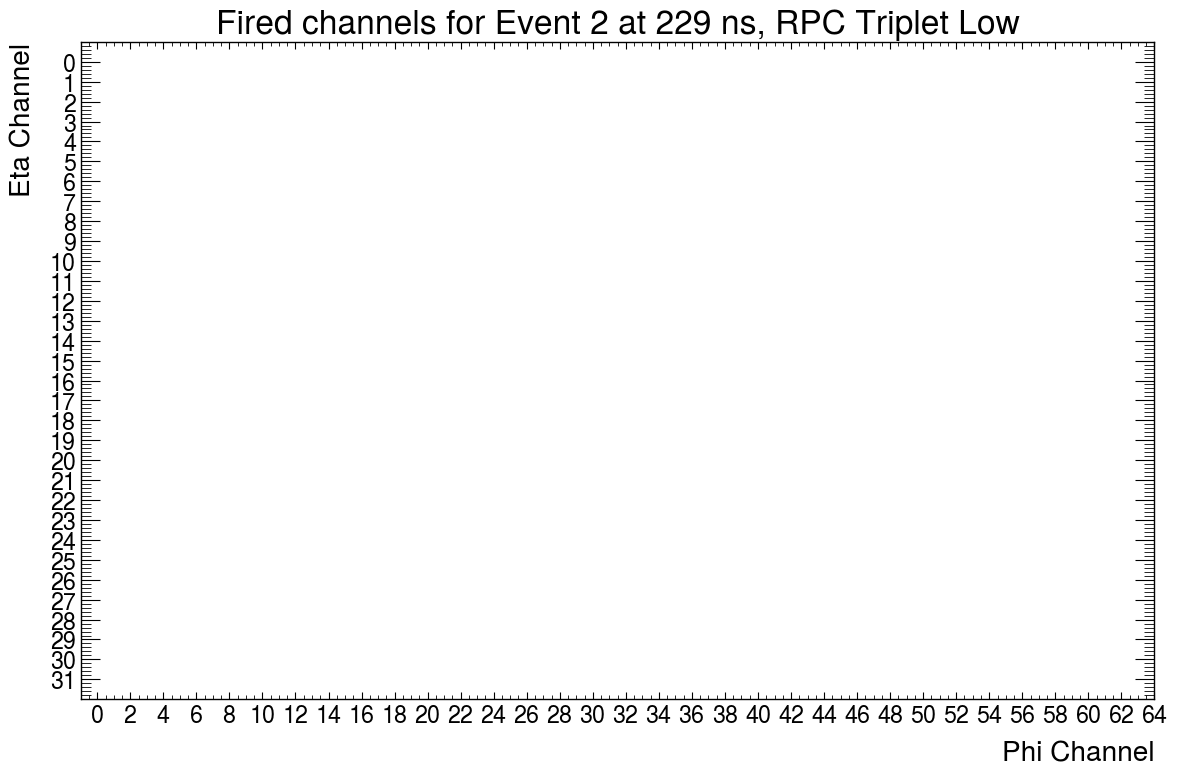

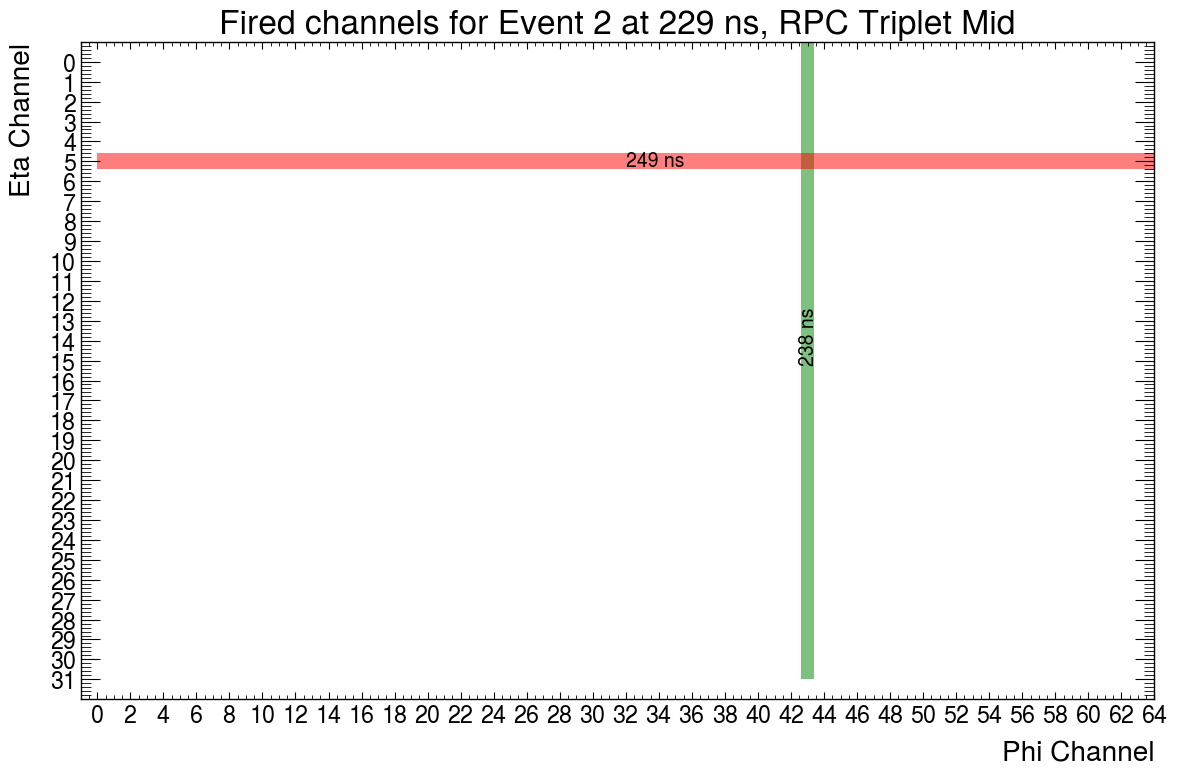

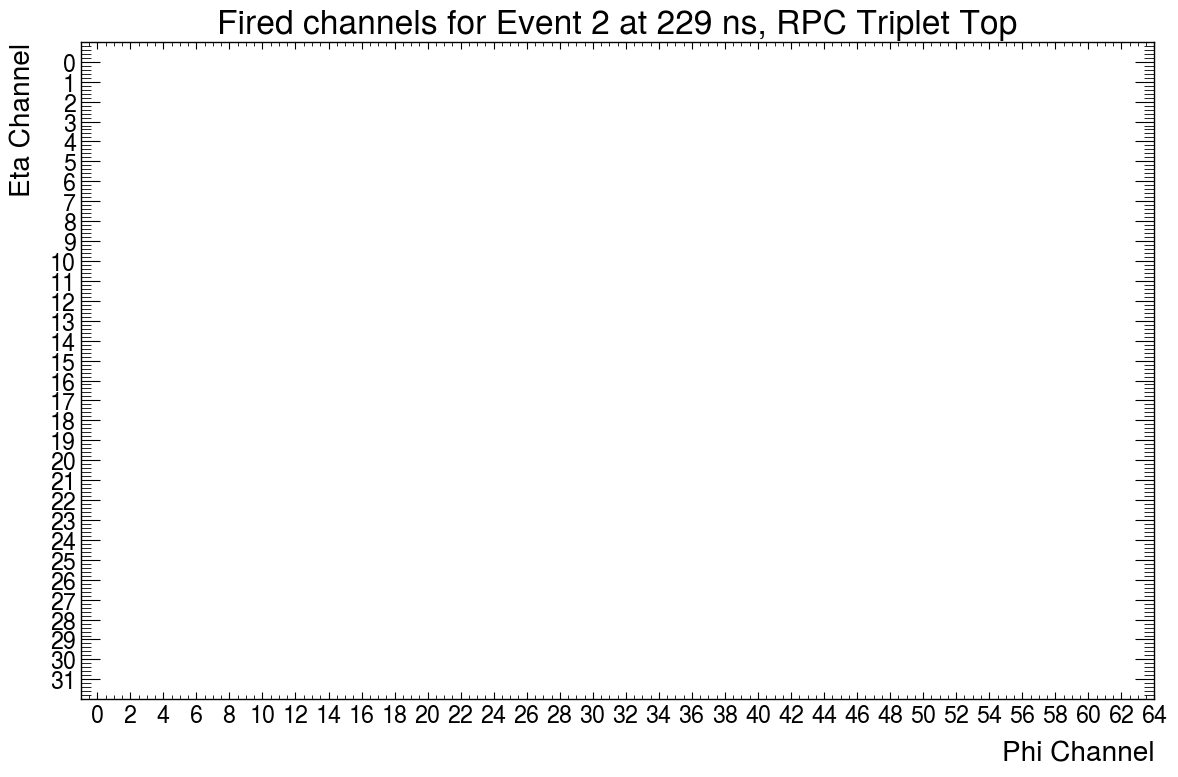

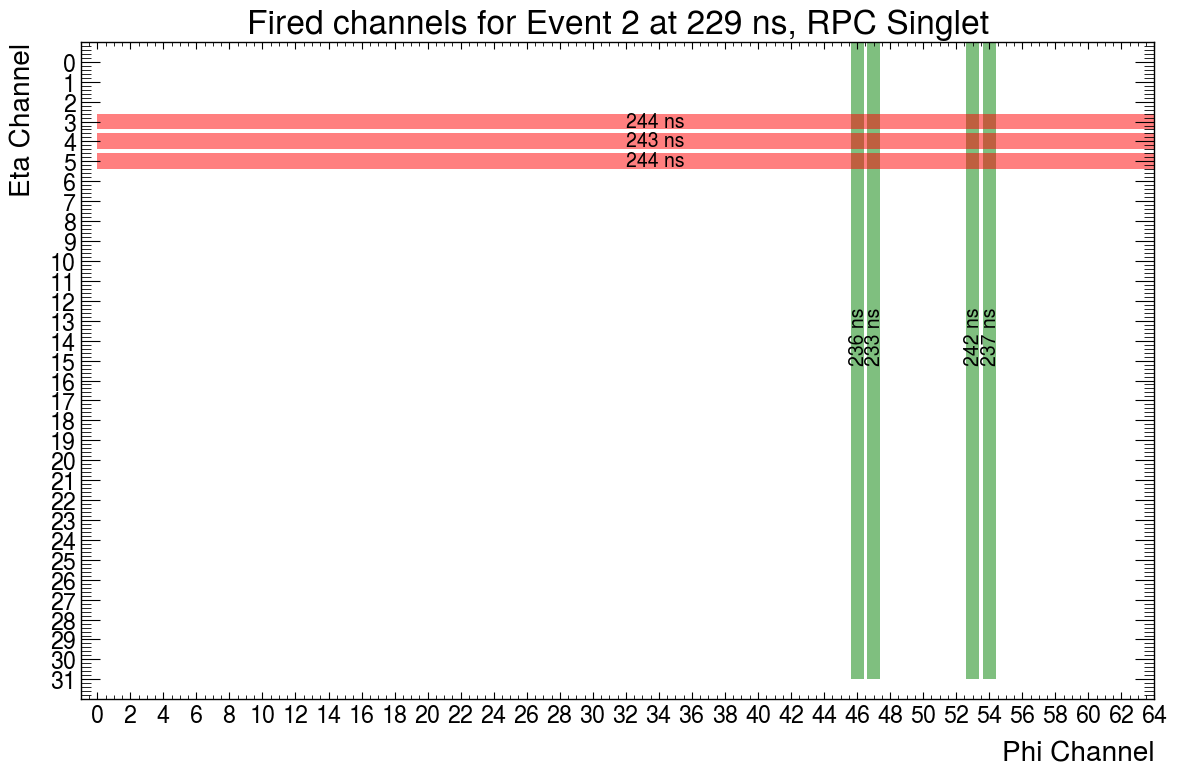

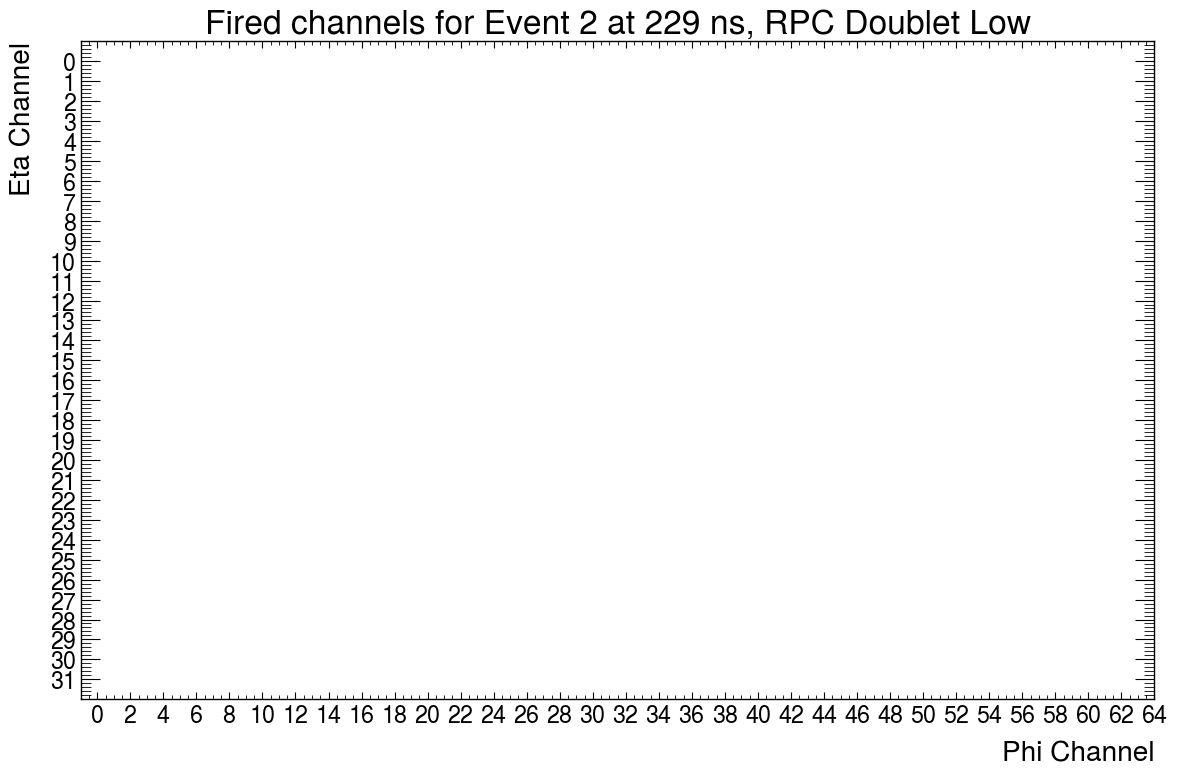

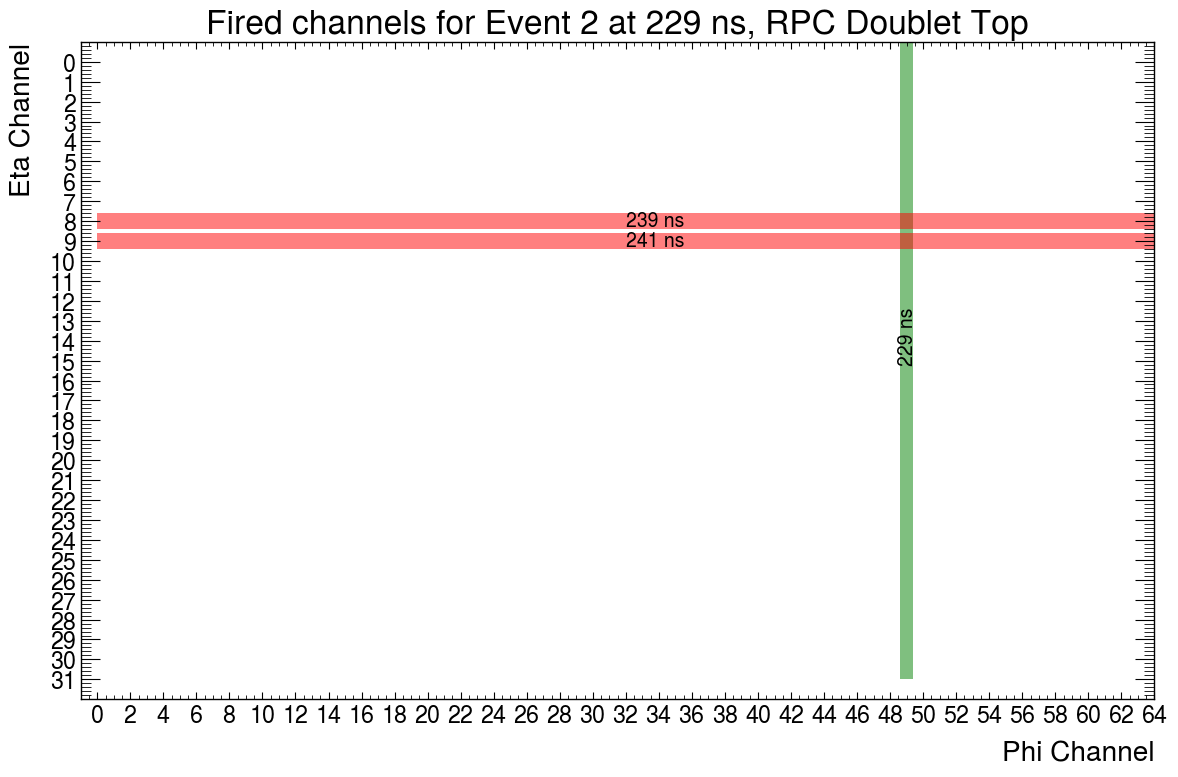

In [29]:
ANT.plot_event_cluster(ANT.convert_cluster_to_plot(cross_chamber_3_rpc_events[0]))

In [8]:
def extract_DT(coords):
    #coords = [[RPC1_coords],[RPC2_coords],[RPC3_coords],...]
    #RPC_coords = [x_coords,y_coords,avg_time on phi side hits]

    times = [[RPC,x[2]] for RPC, x in enumerate(coords) if isinstance(x[2], (float, int))]

    #Should already be sorted, but just in case.
    #Sort times by RPC, with RPC at lowest height at first entry.

    if len(times) > 1:

        times_sorted = sorted(times, key=lambda x: x[0])

        #print(times_sorted)

        dT = times_sorted[-1][1]-times_sorted[0][1]
        #if dT>0 this implies the particles hit the higher RPC after the lower one, so the particle is travelling upwards here.
        #Vice-versa for dT < 0 

        return dT
    else:
        pass

In [22]:
x = extract_coords_timed(cross_chamber_3_rpc_events[1413],3)

print(x)

[[[89.78125], [23.8752], 227.0], [[89.78125], [23.8752], 259.0], [[88.4], [25.3674], 258.0], [[84.25625000000001], [40.2894], 278.3333333333333], [[81.49375000000002], [50.73479999999999], 269.0], [[], [], 'N']]


In [23]:
test_dt = extract_DT(x)

print(test_dt)

42.0


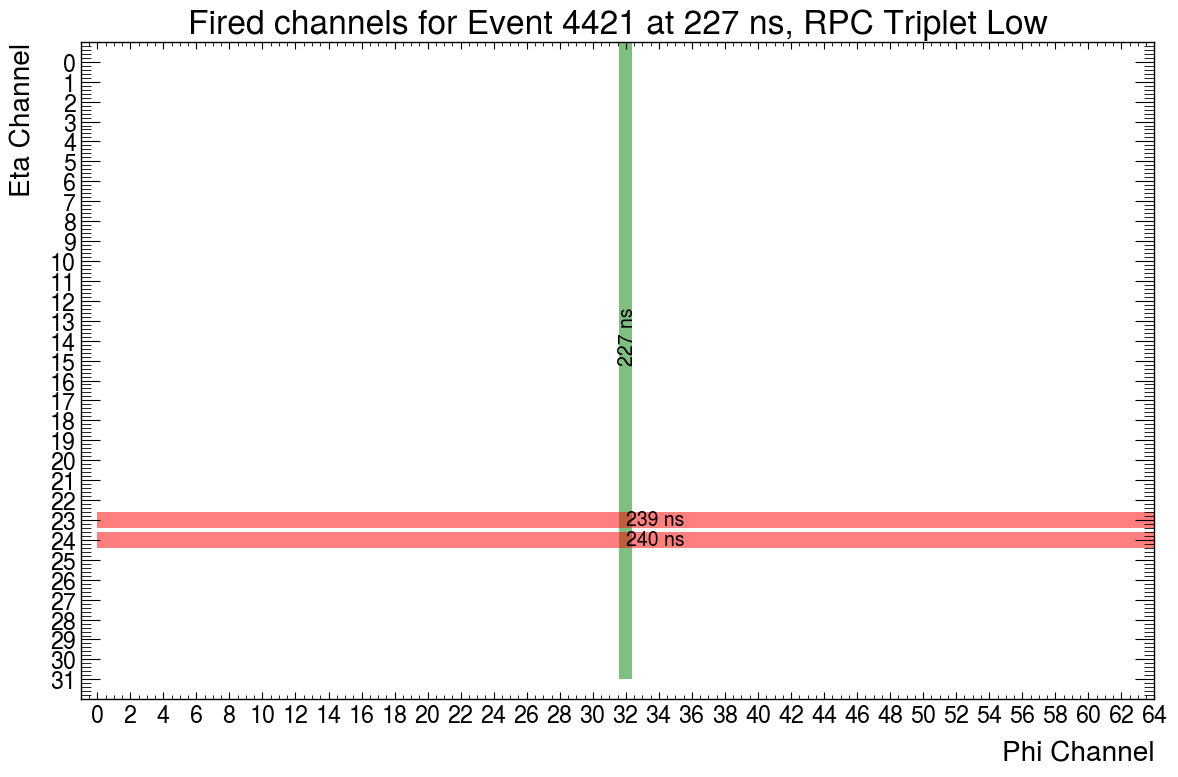

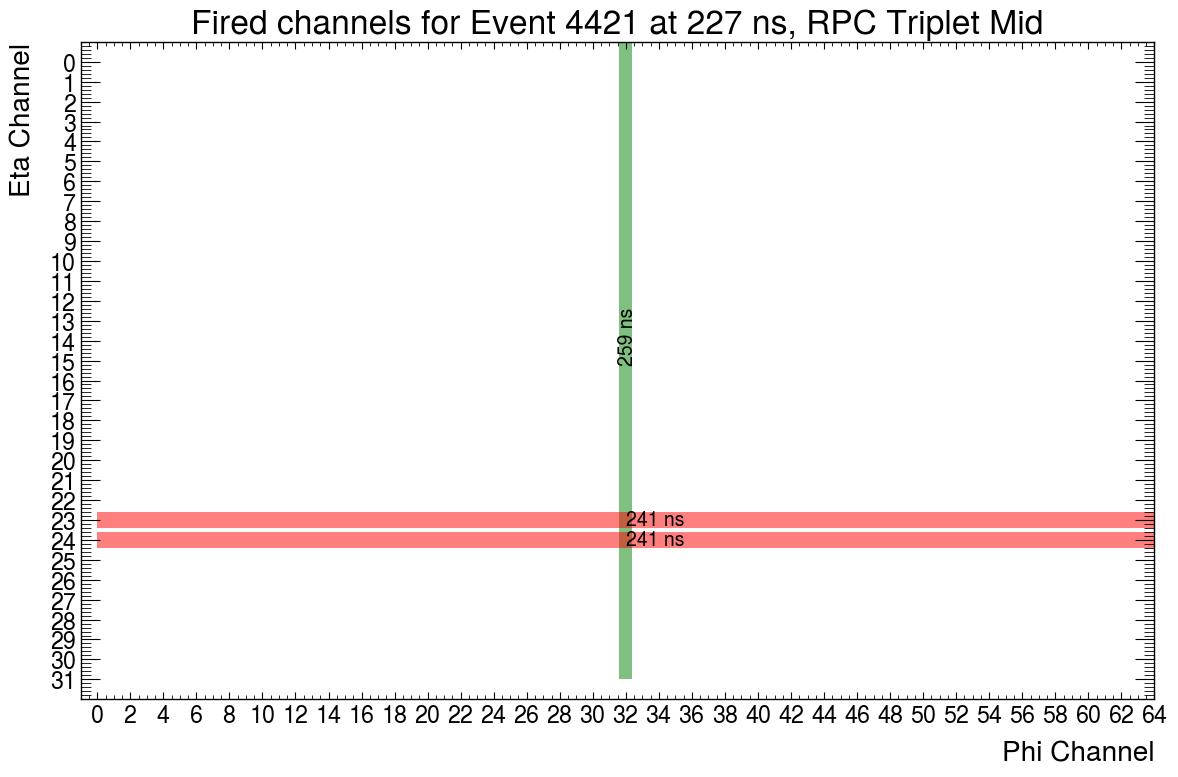

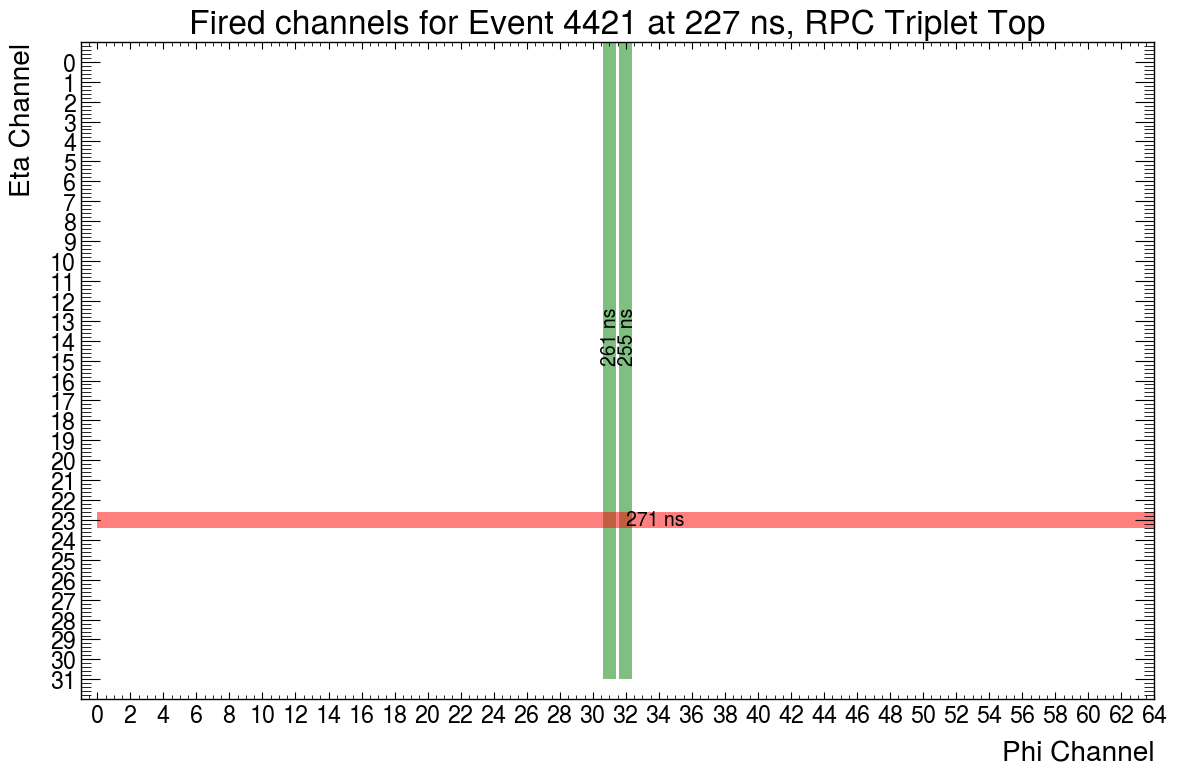

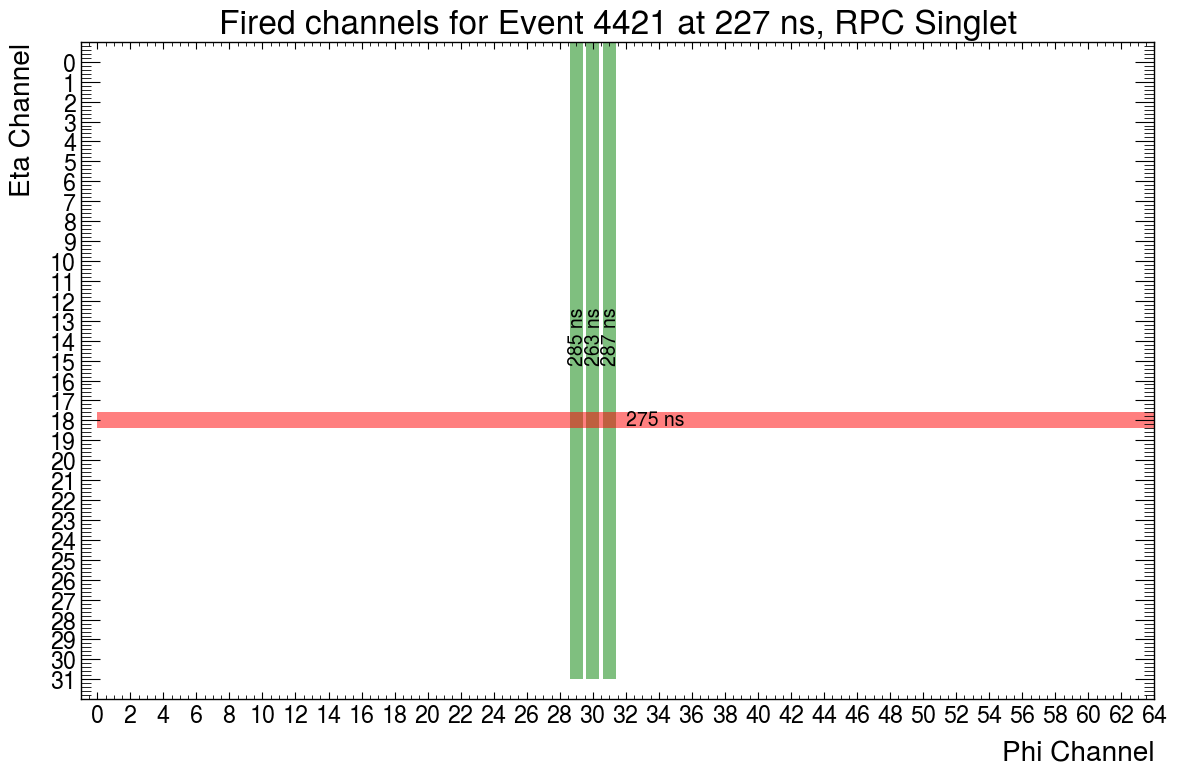

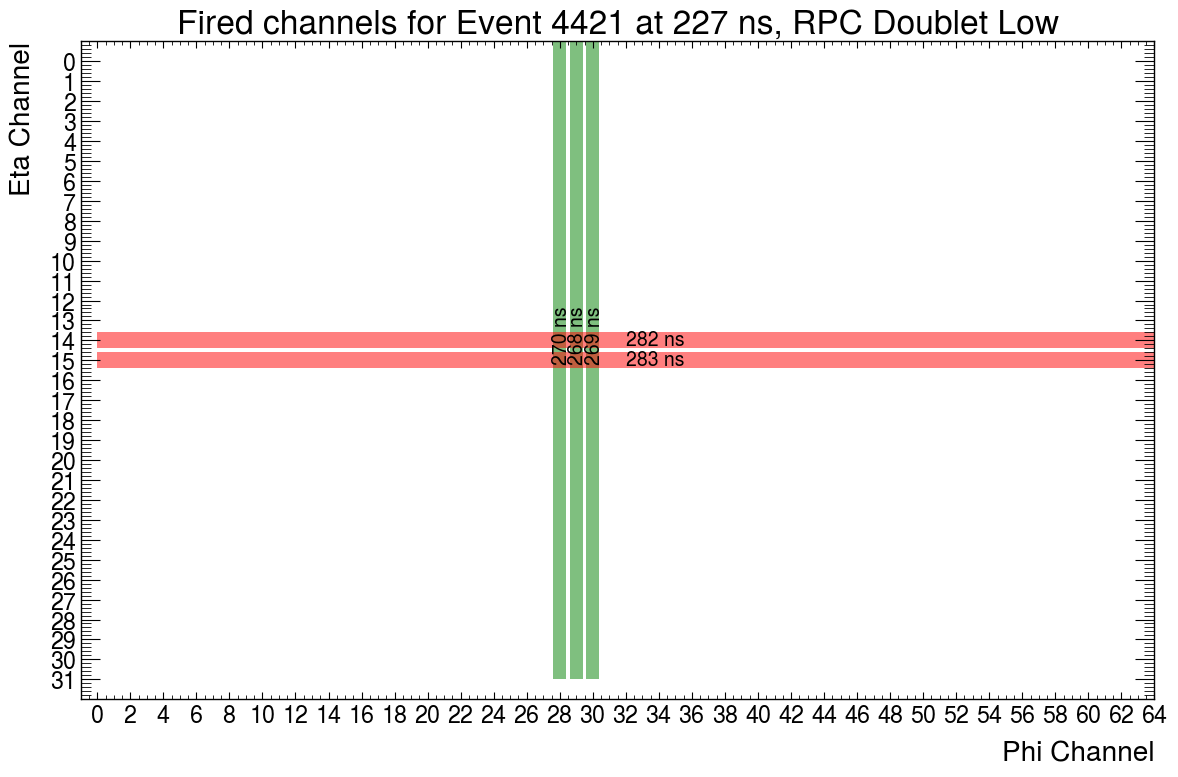

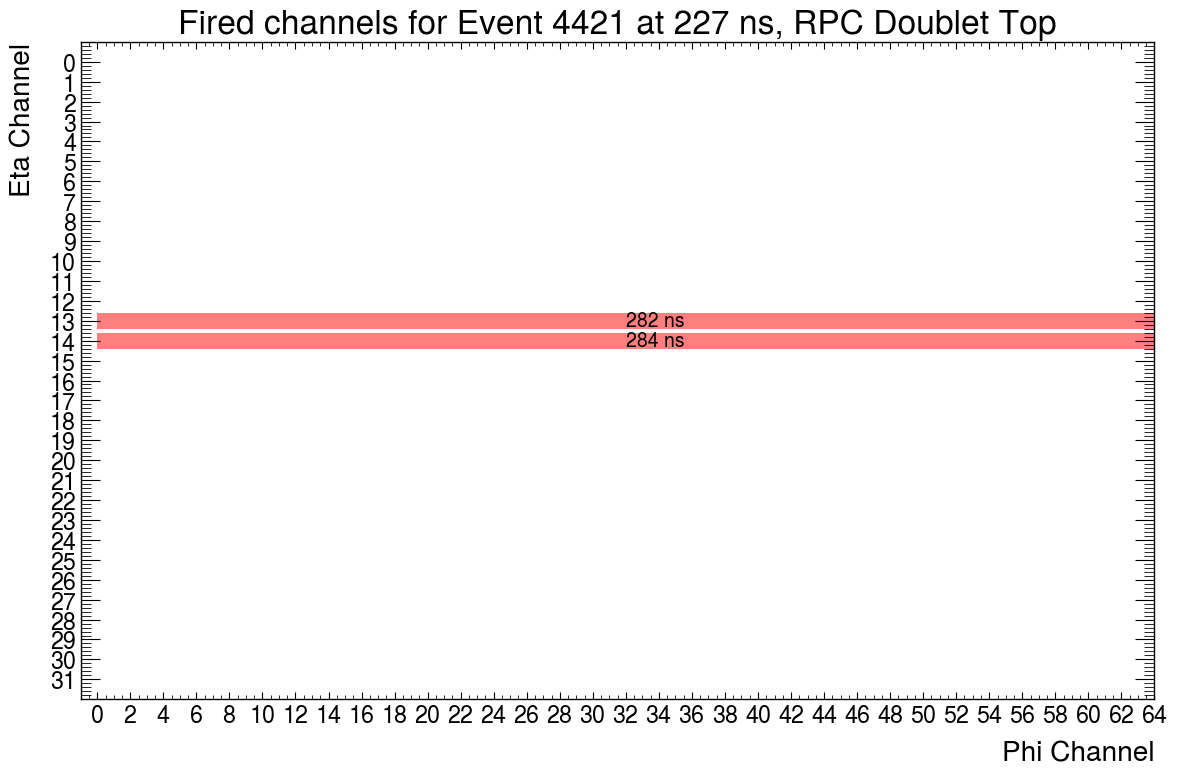

In [21]:
ANT.plot_event_cluster(ANT.convert_cluster_to_plot(cross_chamber_3_rpc_events[1413]))

In [9]:
def reconstruct_timed(event,max_cluster_size):

    #timed tag indicates that timing information from RPC is used to determine direction of vertical transversal of "particle" in the event.

    max_residual = 100

    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]
    RPC_heights = [0.6,1.8,3.0,61.8,121.8,123] #Heights of middle point of each RPC, measured from the bottom of the Triplet Low RPC. Units are cm.

    #Extract x and y coords of cluster in event

    coords = extract_coords_timed(event,max_cluster_size)

    dT = extract_DT(coords)

    if dT is None:
        print("Failed to reconstruct, dT is NoneType")
        return None

    # Count the number of empty RPCs
    empty_RPC_count = sum(1 for item in coords if item == [[], [],'N'])

    # If less than 3 elements of coords are occupied, exit the function
    if empty_RPC_count > 3:
        print("Failed to reconstruct, not enough coords")
        return None  # Exit the function

    #ITERATING OVER EVERY POSSIBLE COMBINATION OF x,y,z over all 3 RPCs (limited to one x,y per RPC).
    #Doesn't look particularly nice, but there are not many coordinates to loop over usually....

    combinations = ANT.generate_hit_coords_combo(coords,RPC_heights)

    #Now for each combo in combinations, attempt to reconstruct a path. See which one gives the best trajectory.

    #If success, print parameters of fitting function.
    #If fail, print reconstruction failed.

    residuals_current = np.inf
    optimised_coords = None
    optimised_d= None
    optimised_centroid= None

    for ind,combo in enumerate(combinations):

        centroid, d, residuals = ANT.fit_event(combo)
        if residuals < residuals_current:

            # If new fit is better than old then replace old fit.
            residuals_current = residuals
            optimised_centroid = centroid
            optimised_d = d
            optimised_coords = combinations[ind]

    #if dT>0 this implies the particles hit the higher RPC after the lower one, so the particle is travelling upwards here.
    #Vice-versa for dT < 0.

    #dT = 0 case?
    
    if dT > 0:
        if optimised_d[2] < 0:
            optimised_d = np.multiply(optimised_d,-1)
    else:
        if optimised_d[2] > 0:
            optimised_d = np.multiply(optimised_d,-1)

    if residuals_current<max_residual:
        return optimised_centroid, optimised_d, optimised_coords, combinations, residuals_current, dT
    else:
        print("Failed to reconstruct, residuals too large")
        #return optimised_centroid, optimised_d, optimised_coords, combinations, residuals_current
        return None

In [19]:
def extract_angles_phi_eta_timed(filtered_events):

    #Input is filtered_events, output of ANT.filter_events() function

    angles_eta = []
    angles_phi = []
    delta_times = []

    for i,filtered_event in enumerate(filtered_events):

        result = reconstruct_timed(filtered_event,3)

        if result is None:
            print(f"Index= {i}")

        if result is not None:

            delta_times.append(result[5])

            if abs(result[5])>40:
                print(f"Index of abnormal event= {i}")
            #Only save angles that actually were reconstructed well
            
            # a.b = |a||b|cos(x)

            #eta angle. 
            #work out the projection of the direction vector in the plane.
            
            v_parr_eta = np.array([0,result[1][1],result[1][2]])

            theta_eta = np.arccos(np.dot(v_parr_eta,[0,0,1]) / np.linalg.norm(v_parr_eta))

            if theta_eta > np.pi / 2:
                theta_eta= np.pi - theta_eta
            
            if v_parr_eta[1] > 0:
                theta_eta*=-1

            angles_eta.append(theta_eta)

            # Phi angles
            #work out the projection of the direction vector in the plane.
            
            v_parr_phi = np.array([result[1][0],0,result[1][2]])

            theta_phi = np.arccos(np.dot(v_parr_phi,[0,0,1]) / np.linalg.norm(v_parr_phi))

            if theta_phi > np.pi / 2:
                theta_phi= np.pi - theta_phi
            
            if v_parr_phi[0] < 0:
                theta_phi*=-1

            angles_phi.append(theta_phi)

    return angles_eta, angles_phi, delta_times

        #ProAnubis setup is at 45 degrees to vertical. 
        #Project direction vector onto planes to work out phi and eta angular distributions. Should be no assymmetry in phi.
        #Expect asymmetry in eta. 

In [20]:
angles_eta, angles_phi, times_delta = extract_angles_phi_eta_timed(cross_chamber_3_rpc_events)

Failed to reconstruct, not enough coords
Index= 7
Failed to reconstruct, dT is NoneType
Index= 20
Failed to reconstruct, residuals too large
Index= 24
Failed to reconstruct, not enough coords
Index= 30
Failed to reconstruct, not enough coords
Index= 35
Failed to reconstruct, not enough coords
Index= 39
Failed to reconstruct, dT is NoneType
Index= 42
Failed to reconstruct, residuals too large
Index= 44
Failed to reconstruct, dT is NoneType
Index= 52
Failed to reconstruct, not enough coords
Index= 53
Failed to reconstruct, not enough coords
Index= 56
Failed to reconstruct, residuals too large
Index= 61
Failed to reconstruct, not enough coords
Index= 63
Failed to reconstruct, not enough coords
Index= 64
Failed to reconstruct, not enough coords
Index= 76
Failed to reconstruct, not enough coords
Index= 77
Failed to reconstruct, not enough coords
Index= 79
Failed to reconstruct, residuals too large
Index= 80
Failed to reconstruct, not enough coords
Index= 84
Failed to reconstruct, not enough

In [12]:
print(len(times_delta))

22923


In [13]:
def plot_angle_distribution_absolute(angles, title):
    #Plot angular distribution given phi and eta angular distribution separately.
    #Plot absolute number of counts rather than relative occurence.

    plt.figure(figsize=(16,10))

    # Plot histogram with counts
    plt.hist(angles, bins=61, density=False,edgecolor='black',alpha=0.7, label='ProANUBIS muon distribution')

    # Convert radians to degrees for x-ticks
    x_ticks_degrees = np.linspace(-90, 90, num=19)
    x_ticks_radians = np.radians(x_ticks_degrees)

    # Set x-ticks labels and positions
    plt.xticks(x_ticks_radians, x_ticks_degrees)
    
    plt.annotate(f"Number of events = {len(angles)}",(0.2,0.6),xycoords='figure fraction')

    # Customize the plot
    plt.xlabel('Angle/ degrees from axis perpendicular to surface of RPCs')
    plt.ylabel('Number of Counts')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

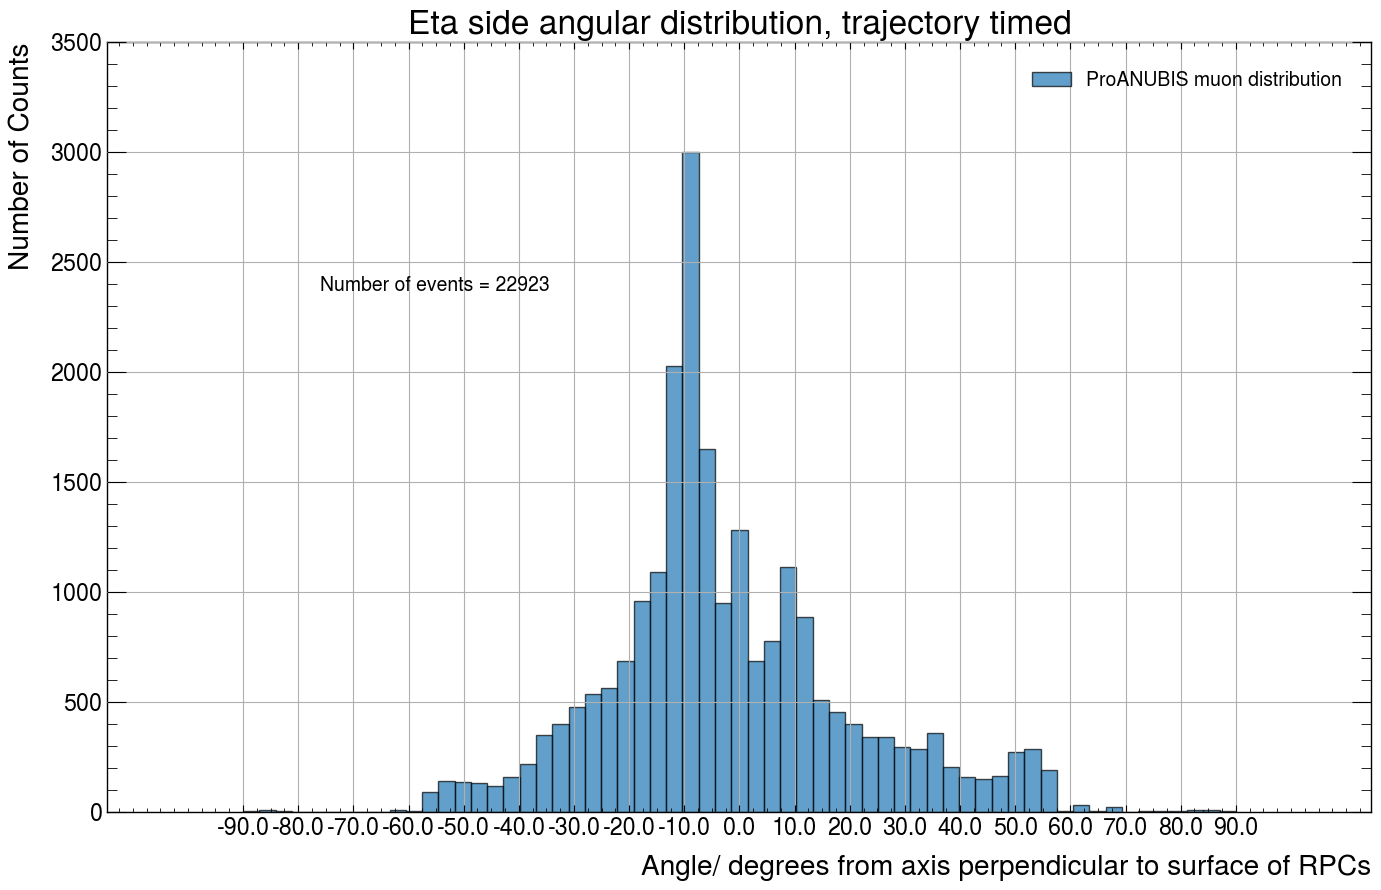

In [14]:
plot_angle_distribution_absolute(angles_eta,"Eta side angular distribution, trajectory timed")

Checking old code

In [52]:
def reconstruct(event,max_cluster_size):
    max_residual = 100

    # event = ['Event x',TIMEBIN, [[[RPC1_PHI_CLUSTERS],[RPC1_ETA_CLUSTERS]],[[...],[...]],...]
    RPC_heights = [0.6,1.8,3.0,61.8,121.8,123] #Heights of middle point of each RPC, measured from the bottom of the Triplet Low RPC. Units are cm.

    #Extract x and y coords of cluster in event

    coords = ANT.extract_coords(event,max_cluster_size)

     # Count the number of empty RPCs
    empty_RPC_count = sum(1 for item in coords if item == [[], []])

    # # Count the number of non-empty RPCs at the beginning of the coords list
    # non_empty_count = sum(1 for item in coords[:3] if item != [[], []])

    # # If there are only three non-empty RPCs at the beginning, exit the function
    # if empty_RPC_count >= 3 and non_empty_count == 3:
    #     print("Failed to reconstruct, not enough chambers crossed")
    #     return None  # Exit the function

    # If less than 3 elements of coords are occupied, exit the function
    if empty_RPC_count > 3:
        print("Failed to reconstruct, not enough coords")
        return None  # Exit the function

    #ITERATING OVER EVERY POSSIBLE COMBINATION OF x,y,z over all 3 RPCs (limited to one x,y per RPC).
    #Doesn't look particularly nice, but there are not many coordinates to loop over usually....

    combinations = ANT.generate_hit_coords_combo(coords,RPC_heights)

    #Now for each combo in combinations, attempt to reconstruct a path. See which one gives the best trajectory.

    #If success, print parameters of fitting function.
    #If fail, print reconstruction failed.

    residuals_current = np.inf
    optimised_coords = None
    optimised_d= None
    optimised_centroid= None

    for ind,combo in enumerate(combinations):

        centroid, d, residuals = ANT.fit_event(combo)
        if residuals < residuals_current:

            # If new fit is better than old then replace old fit.
            residuals_current = residuals
            optimised_centroid = centroid
            optimised_d = d
            optimised_coords = combinations[ind]

    #FLIP VECTOR SO IT POINTS DOWN!
    #Just minor fix for now. In future, find average time of cluster in highest plate and compare with lowest hit plate to
    #determine the vertical direction of a track.
    
    if optimised_d[2]  > 0:
        optimised_d = np.multiply(optimised_d,-1)

    if residuals_current<max_residual:
        return optimised_centroid, optimised_d, optimised_coords, combinations, residuals_current
    else:
        print("Failed to reconstruct, residuals too large")
        #return optimised_centroid, optimised_d, optimised_coords, combinations, residuals_current
        return None
    
def extract_angles_phi_eta(filtered_events):

    #Input is filtered_events, output of ANT.filter_events() function

    angles_eta = []
    angles_phi = []

    for i,filtered_event in enumerate(filtered_events):

        result = ANT.reconstruct(filtered_event,3)

        if result is None:
            print(f"Index= {i}")

        if result is not None:
            #Only save angles that actually were reconstructed well
            
            # a.b = |a||b|cos(x)

            #eta angle. 
            #work out the projection of the direction vector in the plane.
            
            v_parr_eta = np.array([0,result[1][1],result[1][2]])

            theta_eta = np.arccos(np.dot(v_parr_eta,[0,0,1]) / np.linalg.norm(v_parr_eta))

            if theta_eta > np.pi / 2:
                theta_eta= np.pi - theta_eta
            
            if v_parr_eta[1] > 0:
                theta_eta*=-1

            angles_eta.append(theta_eta)

            # Phi angles
            #work out the projection of the direction vector in the plane.
            
            v_parr_phi = np.array([result[1][0],0,result[1][2]])

            theta_phi = np.arccos(np.dot(v_parr_phi,[0,0,1]) / np.linalg.norm(v_parr_phi))

            if theta_phi > np.pi / 2:
                theta_phi= np.pi - theta_phi
            
            if v_parr_phi[0] < 0:
                theta_phi*=-1

            angles_phi.append(theta_phi)

    return angles_eta, angles_phi

        #ProAnubis setup is at 45 degrees to vertical. 
        #Project direction vector onto planes to work out phi and eta angular distributions. Should be no assymmetry in phi.
        #Expect asymmetry in eta. 

In [133]:
angles_eta_old, angles_phi_old = extract_angles_phi_eta(cross_chamber_3_rpc_events)

Failed to reconstruct, not enough coords
Index= 7
Failed to reconstruct, not enough coords
Index= 20
Failed to reconstruct
Index= 24
Failed to reconstruct, not enough coords
Index= 30
Failed to reconstruct, not enough coords
Index= 35
Failed to reconstruct, not enough coords
Index= 39
Failed to reconstruct, not enough coords
Index= 42
Failed to reconstruct
Index= 44
Failed to reconstruct, not enough coords
Index= 52
Failed to reconstruct, not enough coords
Index= 53
Failed to reconstruct, not enough coords
Index= 56
Failed to reconstruct
Index= 61
Failed to reconstruct, not enough coords
Index= 63
Failed to reconstruct, not enough coords
Index= 64
Failed to reconstruct, not enough coords
Index= 76
Failed to reconstruct, not enough coords
Index= 77
Failed to reconstruct, not enough coords
Index= 79
Failed to reconstruct
Index= 80
Failed to reconstruct, not enough coords
Index= 84
Failed to reconstruct, not enough coords
Index= 86
Failed to reconstruct, not enough coords
Index= 89
Failed

In [130]:
print(len(angles_eta))

22923


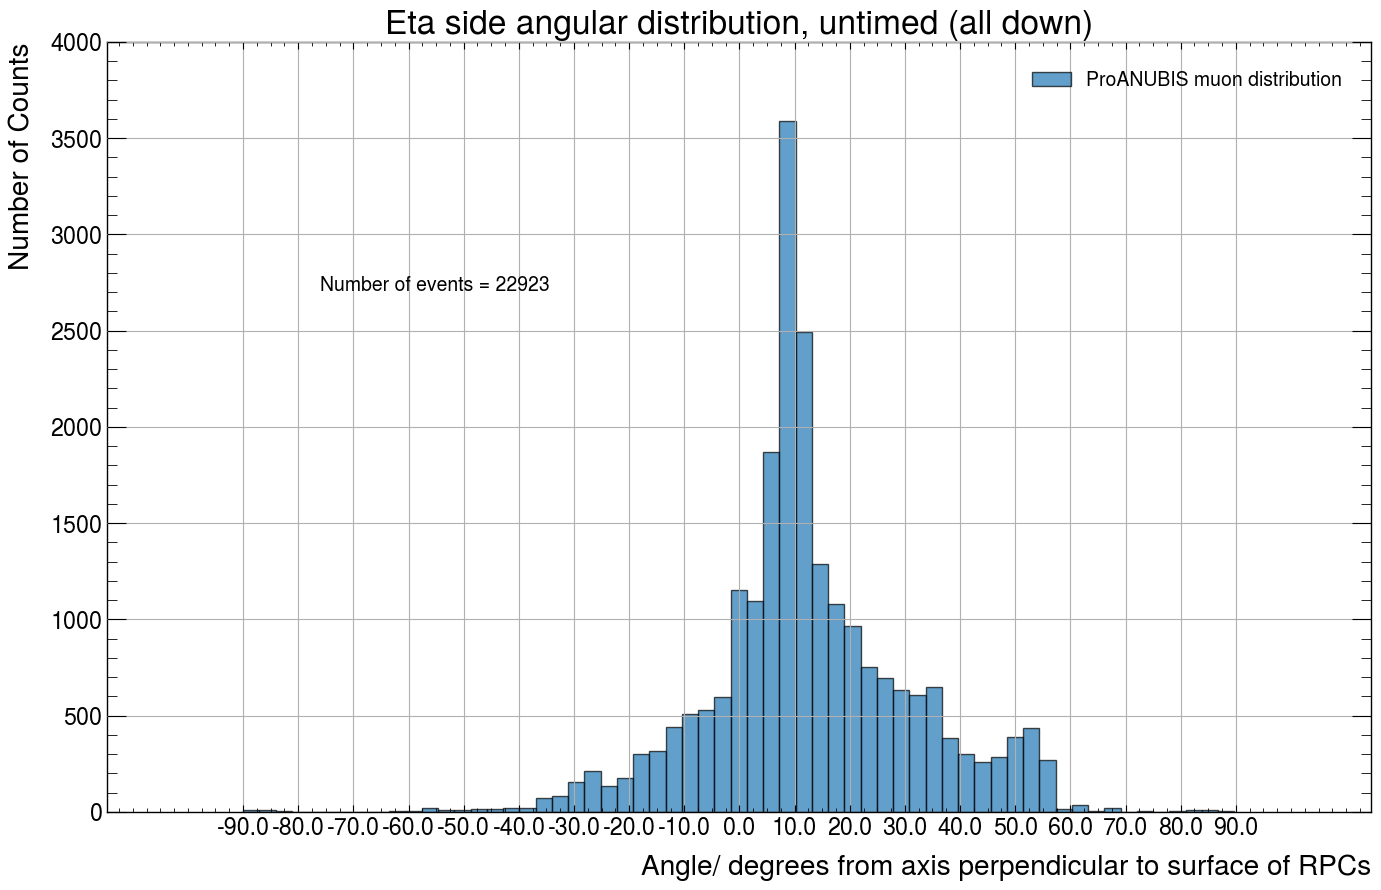

In [134]:
plot_angle_distribution_absolute(angles_eta_old,"Eta side angular distribution, untimed (all down)")

Agrees

In [57]:
def plot_angle_distribution_absolute_2(angles1, angles2, title):
    # Flatten the arrays if they are multidimensional
    angles1 = np.asarray(angles1).flatten()
    angles2 = np.asarray(angles2).flatten()

    plt.figure(figsize=(16, 10))

    # Determine the range for the histograms
    angle_range = (-np.pi/2, np.pi/2)  # You can adjust this range based on your data

    # Plot histogram with counts
    plt.hist(angles1, bins=61, range=angle_range, density=False, edgecolor='black',label='Trajectory Timed')

    plt.hist(angles2, bins=61, range=angle_range, density=False, edgecolor='black', alpha=0.5, color = 'green', label='Untimed')


    # Convert radians to degrees for x-ticks
    x_ticks_degrees = np.linspace(-90, 90, num=19)
    x_ticks_radians = np.radians(x_ticks_degrees)

    # Set x-ticks labels and positions
    plt.xticks(x_ticks_radians, x_ticks_degrees)

    # Customize the plot
    plt.xlabel('Angle/ degrees from axis perpendicular to surface of RPCs')
    plt.ylabel('Number of Counts')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

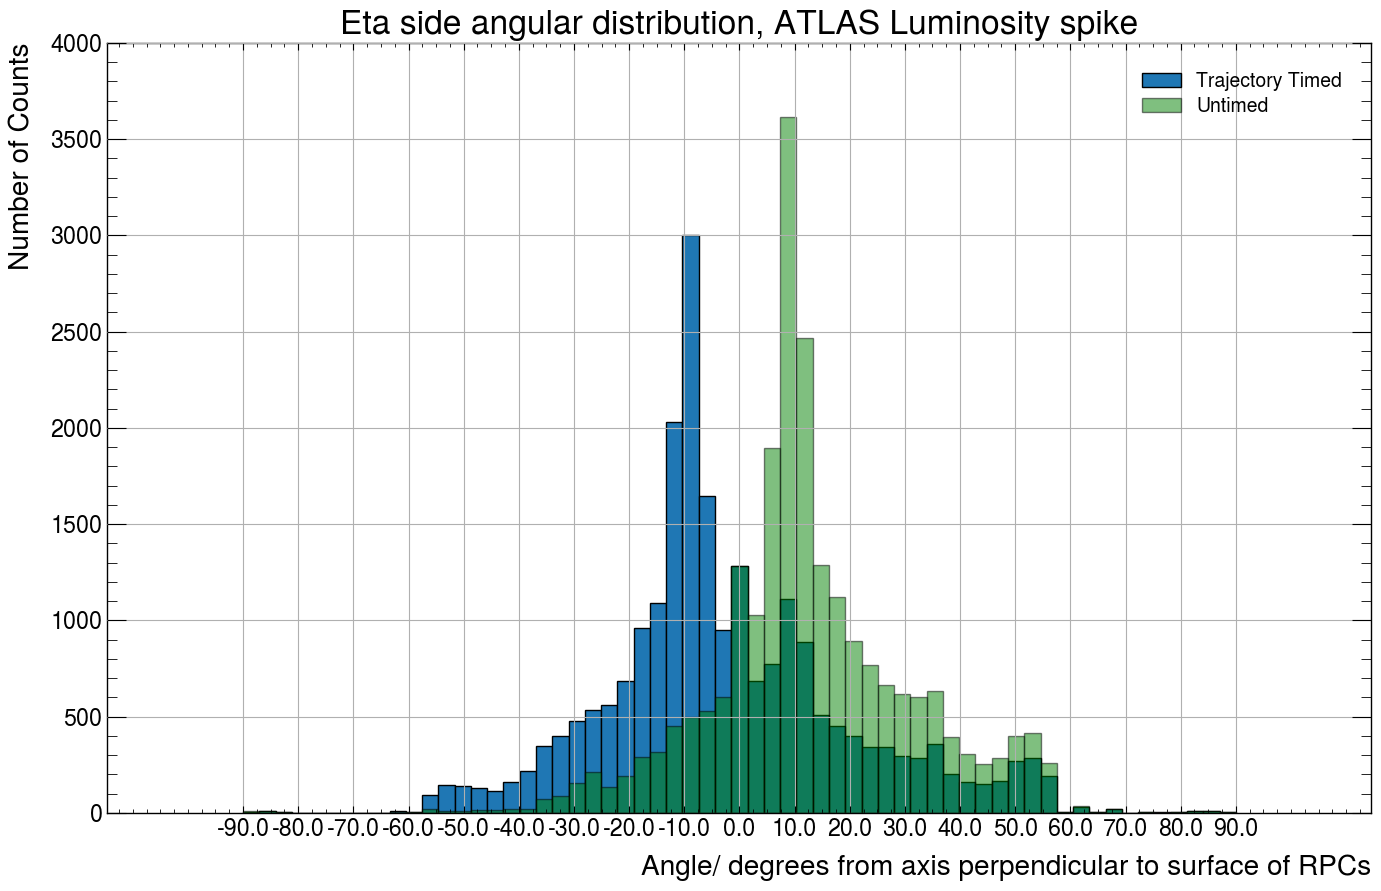

In [141]:
plot_angle_distribution_absolute_2(angles_eta,angles_eta_old,"Eta side angular distribution, ATLAS Luminosity spike")

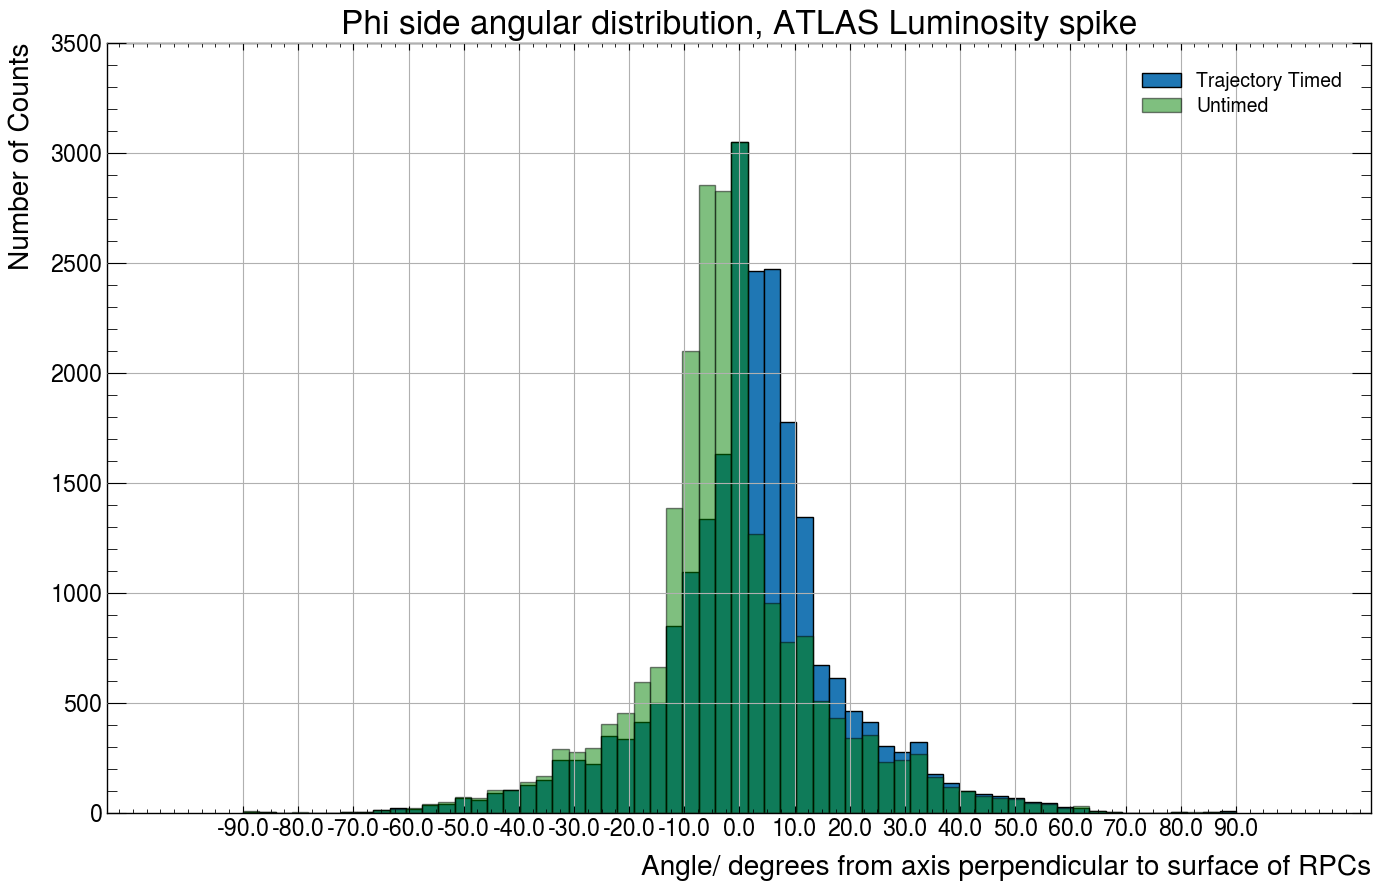

In [142]:
plot_angle_distribution_absolute_2(angles_phi,angles_phi_old,"Phi side angular distribution, ATLAS Luminosity spike")

Plotting dT distributions

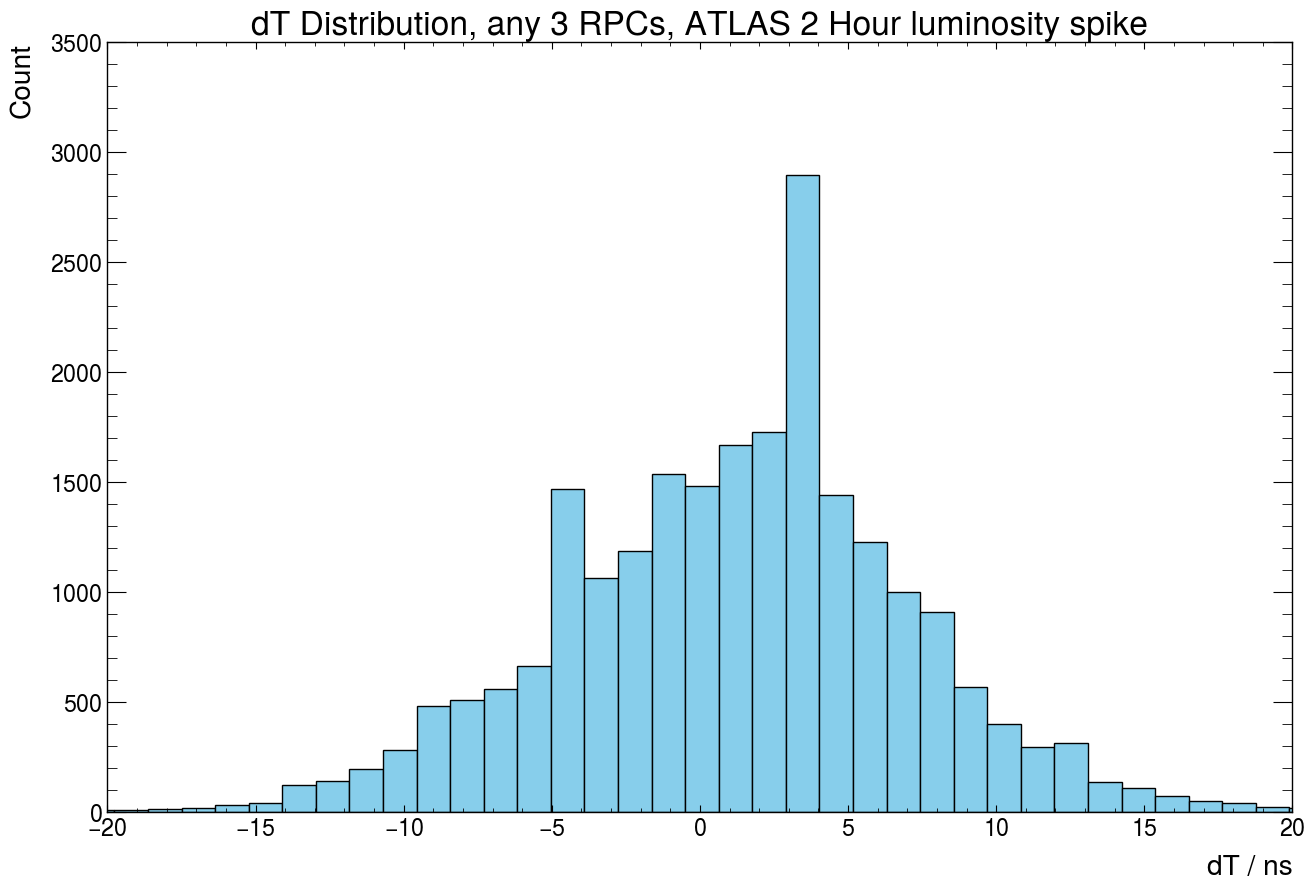

In [83]:
plt.figure(figsize=(15,10))

# Plotting histogram
plt.hist(times_delta, bins=100, color='skyblue', edgecolor='black')
plt.xlim(-20,20)

# Adding labels and title

#Positive dT indicates upwards trajectory
plt.xlabel('dT / ns')
plt.ylabel('Count')
plt.title('dT Distribution, any 3 RPCs, ATLAS 2 Hour luminosity spike')

# Displaying the plot
plt.show()

#Large tails effect of timewindow size, can put filter on max dT to avoid. 

In [18]:
print(min(times_delta)) 

-62.833333333333314


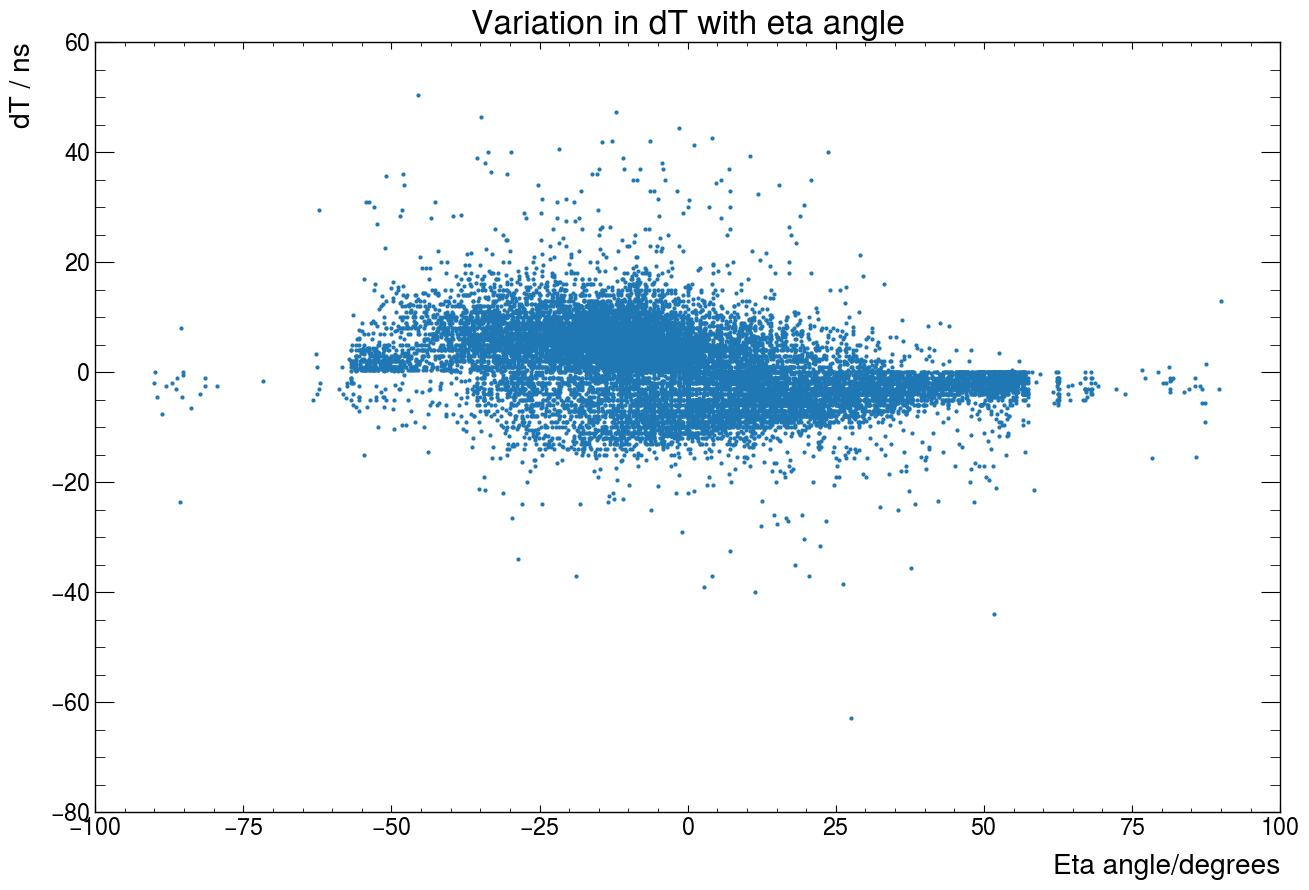

In [47]:
plt.figure(figsize=(15,10))

angles_eta_degrees = [x*180/np.pi for x in angles_eta]

# Plotting figure
plt.scatter(angles_eta_degrees, times_delta, marker='o', linestyle='-',s=4)

# Adding labels and title
plt.xlabel('Eta angle/degrees')
plt.ylabel('dT / ns')
plt.title('Variation in dT with eta angle')

# Displaying the plot
plt.show()

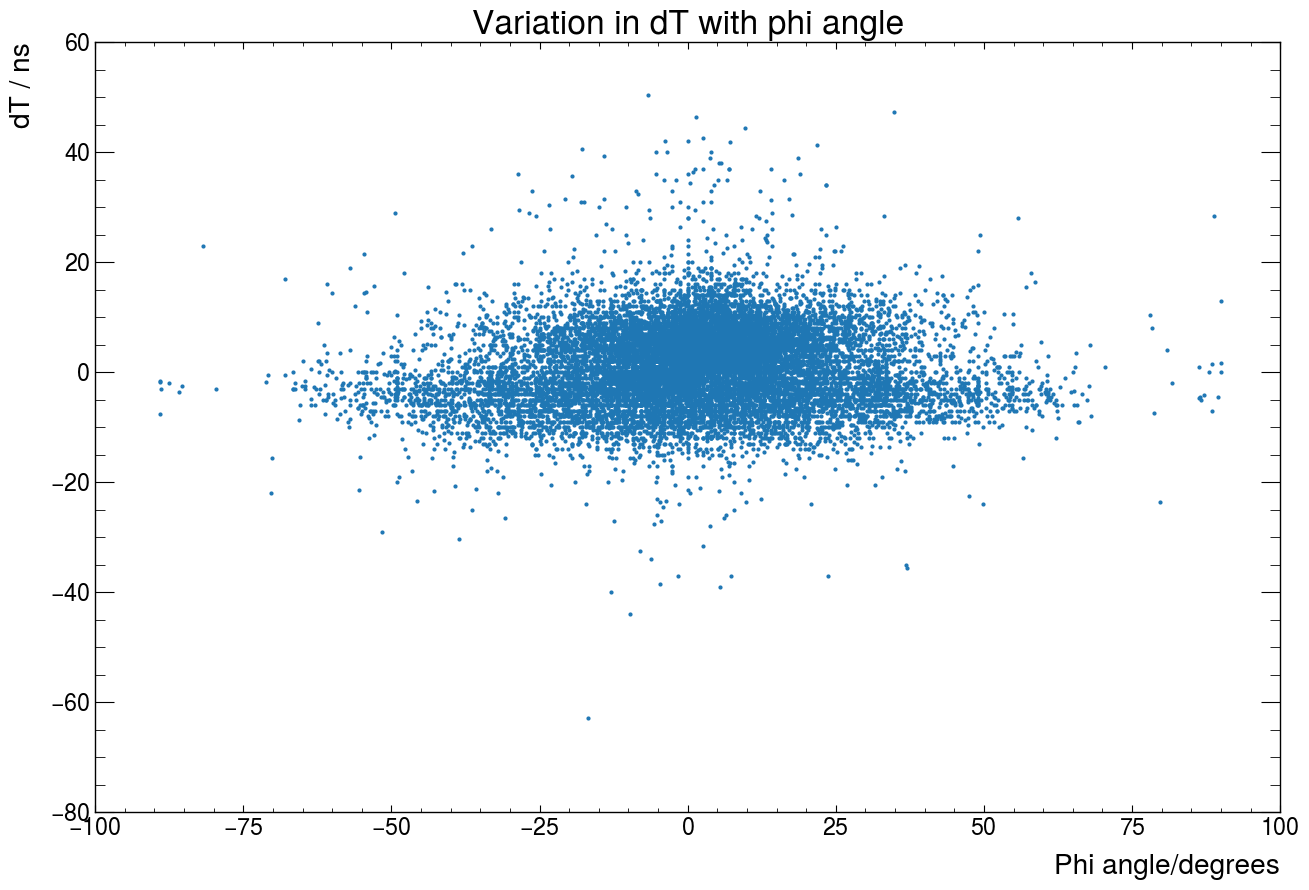

In [45]:
plt.figure(figsize=(15,10))

angles_phi_degrees = [x*180/np.pi for x in angles_phi]

# Plotting figure
plt.scatter(angles_phi_degrees, times_delta, marker='o', linestyle='-', s=4)

# Adding labels and title
plt.xlabel('Phi angle/degrees')
plt.ylabel('dT / ns')
plt.title('Variation in dT with phi angle')

# Displaying the plot
plt.show()

Looking at Cosmic muon distribution from same day a few hours after ATLAS luminosity spike

In [48]:
Cosmics = ANT.importFromHDF5File(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_1427_cosmics.h5")

data_cosmics = [sublist[:55489] for sublist in Cosmics]

c_etaHits, c_phiHits = ANT.divideHitCountsByRPC_Timed(data_cosmics)

#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_cosmics = ANT.FindCoincidentHits(c_etaHits,c_phiHits,15)

#Spatial Clustering
coincident_hits_cosmics_clustered = ANT.cluster(coincident_hits_cosmics)

print(len(coincident_hits_cosmics_clustered))

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1

In [49]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events_cosmics = ANT.filter_events(coincident_hits_cosmics_clustered,2,3)
print("......")
all_6_rpcs_cosmics = ANT.filter_events(coincident_hits_cosmics_clustered,3,6)

Number of events in filter = 9390
......
Number of events in filter = 424


In [50]:
angles_eta_cosmics, angles_phi_Cosmics, times_delta_cosmics = extract_angles_phi_eta_timed(cross_chamber_3_rpc_events_cosmics)

Failed to reconstruct, residuals too large
Index= 3
Failed to reconstruct, not enough coords
Index= 14
Failed to reconstruct, not enough coords
Index= 20
Failed to reconstruct, not enough coords
Index= 28
Failed to reconstruct, not enough coords
Index= 29
Failed to reconstruct, not enough coords
Index= 42
Failed to reconstruct, residuals too large
Index= 43
Failed to reconstruct, not enough coords
Index= 48
Failed to reconstruct, residuals too large
Index= 55
Failed to reconstruct, dT is NoneType
Index= 56
Failed to reconstruct, not enough coords
Index= 57
Failed to reconstruct, not enough coords
Index= 61
Failed to reconstruct, not enough coords
Index= 73
Failed to reconstruct, not enough coords
Index= 74
Failed to reconstruct, not enough coords
Index= 75
Failed to reconstruct, dT is NoneType
Index= 76
Failed to reconstruct, not enough coords
Index= 81
Failed to reconstruct, dT is NoneType
Index= 90
Failed to reconstruct, dT is NoneType
Index= 99
Failed to reconstruct, not enough coor

In [55]:
angles_eta_cosmics_old, angles_phi_cosmics_old = extract_angles_phi_eta(cross_chamber_3_rpc_events_cosmics)

Failed to reconstruct, residuals too large
Index= 3
Failed to reconstruct, not enough coords
Index= 14
Failed to reconstruct, not enough coords
Index= 20
Failed to reconstruct, not enough coords
Index= 28
Failed to reconstruct, not enough coords
Index= 29
Failed to reconstruct, not enough coords
Index= 42
Failed to reconstruct, residuals too large
Index= 43
Failed to reconstruct, not enough coords
Index= 48
Failed to reconstruct, residuals too large
Index= 55
Failed to reconstruct, not enough coords
Index= 56
Failed to reconstruct, not enough coords
Index= 57
Failed to reconstruct, not enough coords
Index= 61
Failed to reconstruct, not enough coords
Index= 73
Failed to reconstruct, not enough coords
Index= 74
Failed to reconstruct, not enough coords
Index= 75
Failed to reconstruct, not enough coords
Index= 76
Failed to reconstruct, not enough coords
Index= 81
Failed to reconstruct, not enough coords
Index= 90
Failed to reconstruct, not enough coords
Index= 99
Failed to reconstruct, not

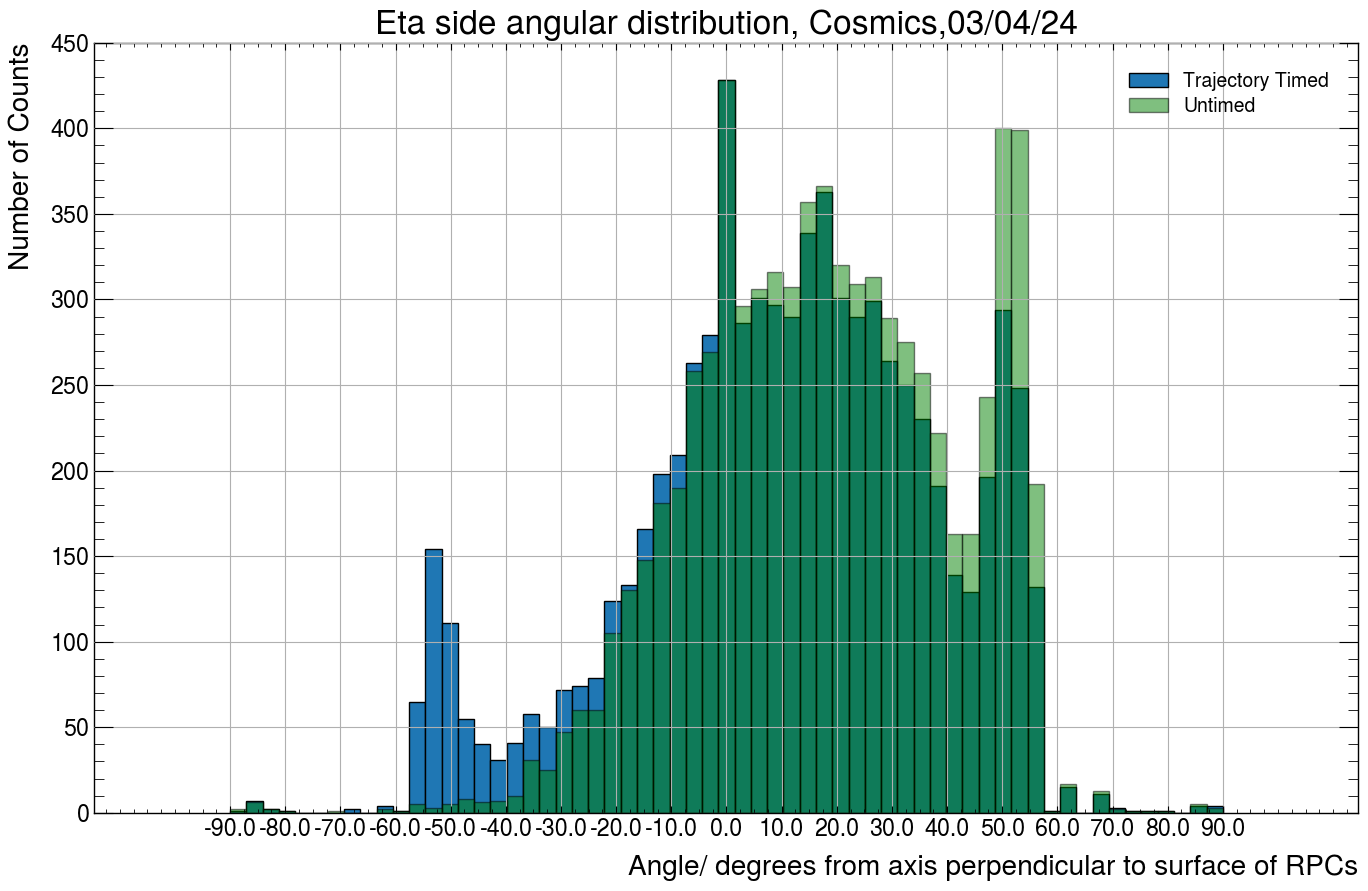

In [58]:
plot_angle_distribution_absolute_2(angles_eta_cosmics,angles_eta_cosmics_old,"Eta side angular distribution, Cosmics,03/04/24")

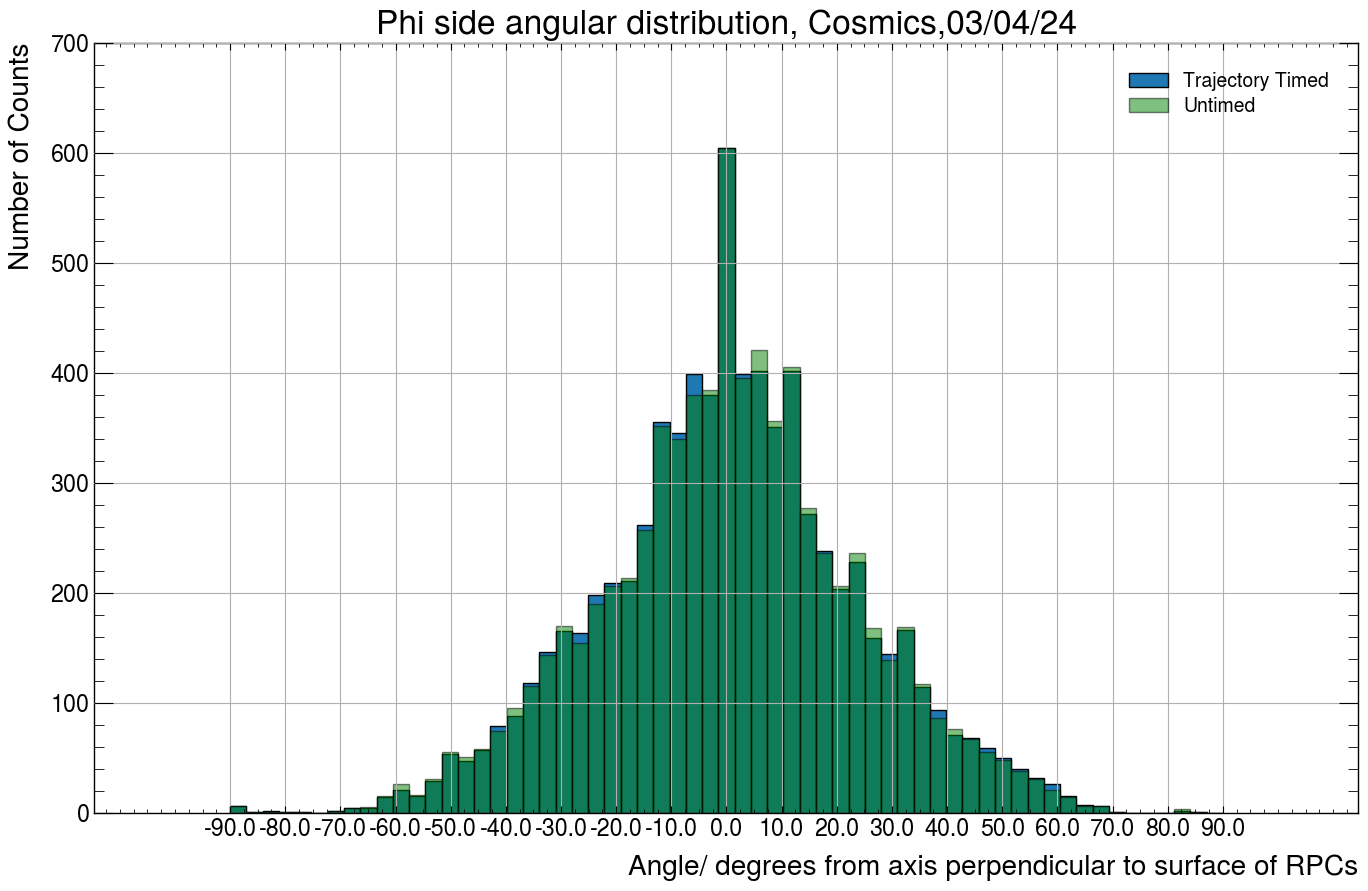

In [59]:
plot_angle_distribution_absolute_2(angles_phi_Cosmics,angles_phi_cosmics_old,"Phi side angular distribution, Cosmics,03/04/24")

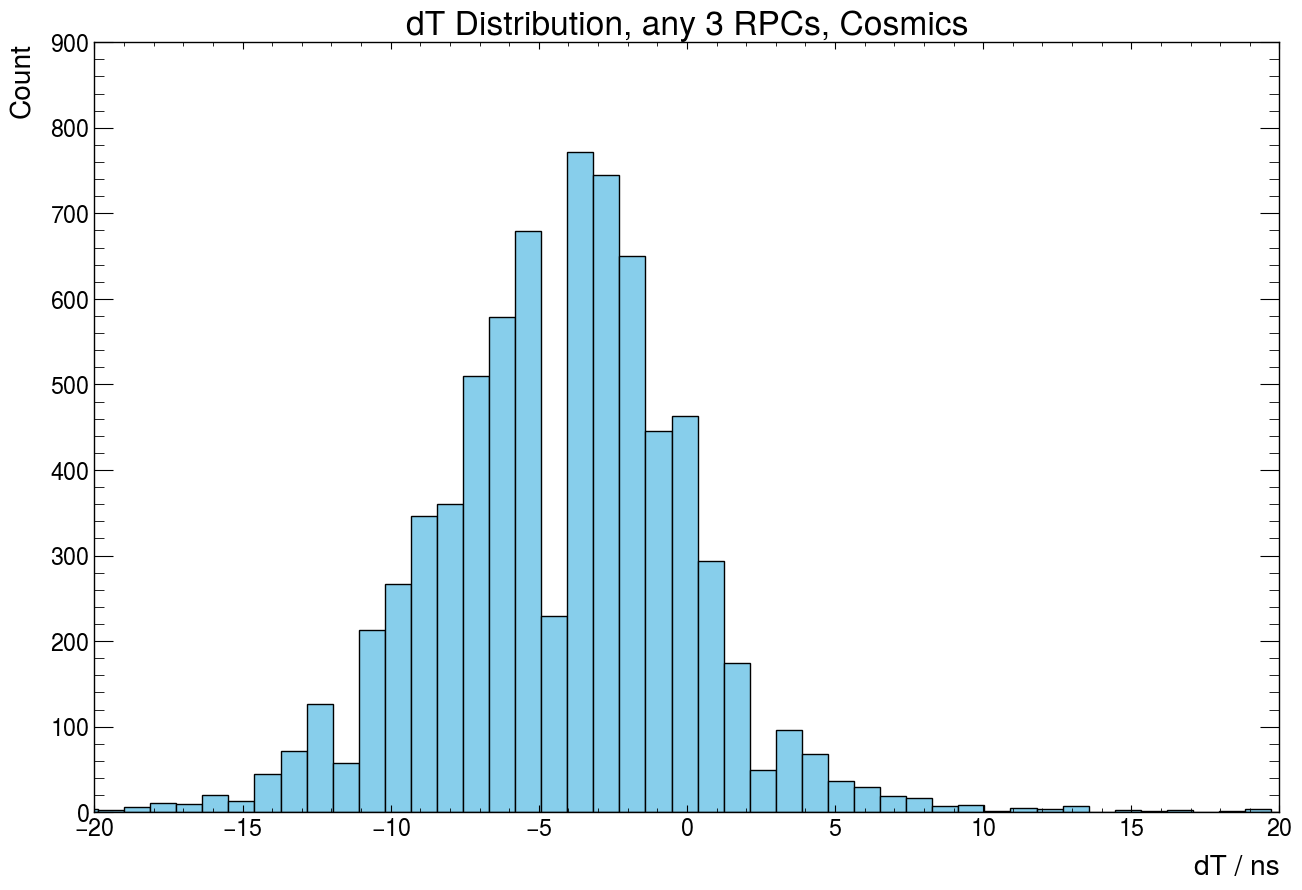

In [77]:
plt.figure(figsize=(15,10))

# Plotting histogram
plt.hist(times_delta_cosmics, bins=100, color='skyblue', edgecolor='black')

plt.xlim(-20,20)

# Adding labels and title

#Positive dT indicates upwards trajectory
plt.xlabel('dT / ns')
plt.ylabel('Count')
plt.title('dT Distribution, any 3 RPCs, Cosmics')

# Displaying the plot
plt.show()

#Large tails effect of timewindow size, can put filter on max dT to avoid. 

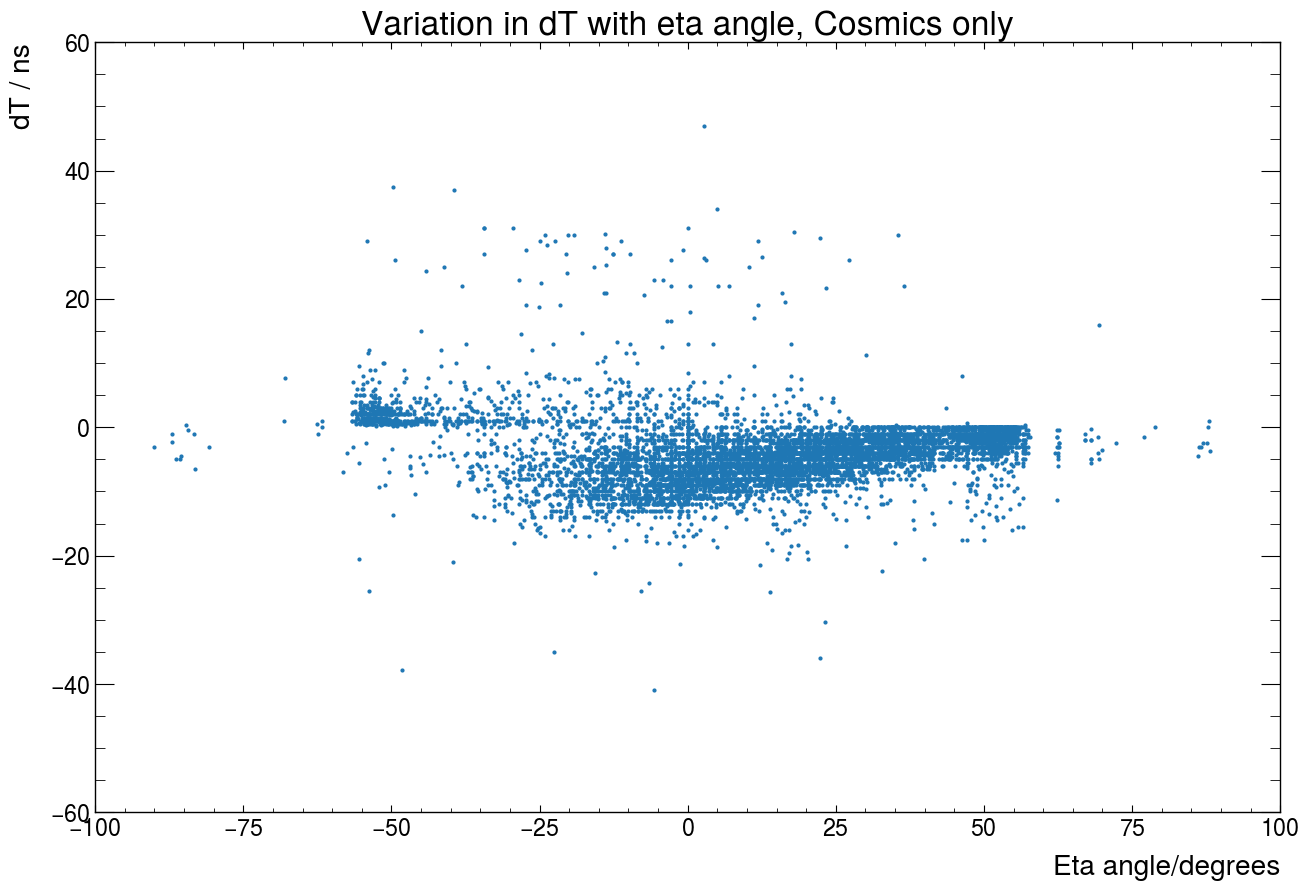

In [60]:
plt.figure(figsize=(15,10))

angles_eta_cosmics_degrees = [x*180/np.pi for x in angles_eta_cosmics]

# Plotting figure
plt.scatter(angles_eta_cosmics_degrees, times_delta_cosmics, marker='o', linestyle='-',s=4)

# Adding labels and title
plt.xlabel('Eta angle/degrees')
plt.ylabel('dT / ns')
plt.title('Variation in dT with eta angle, Cosmics only')

# Displaying the plot
plt.show()

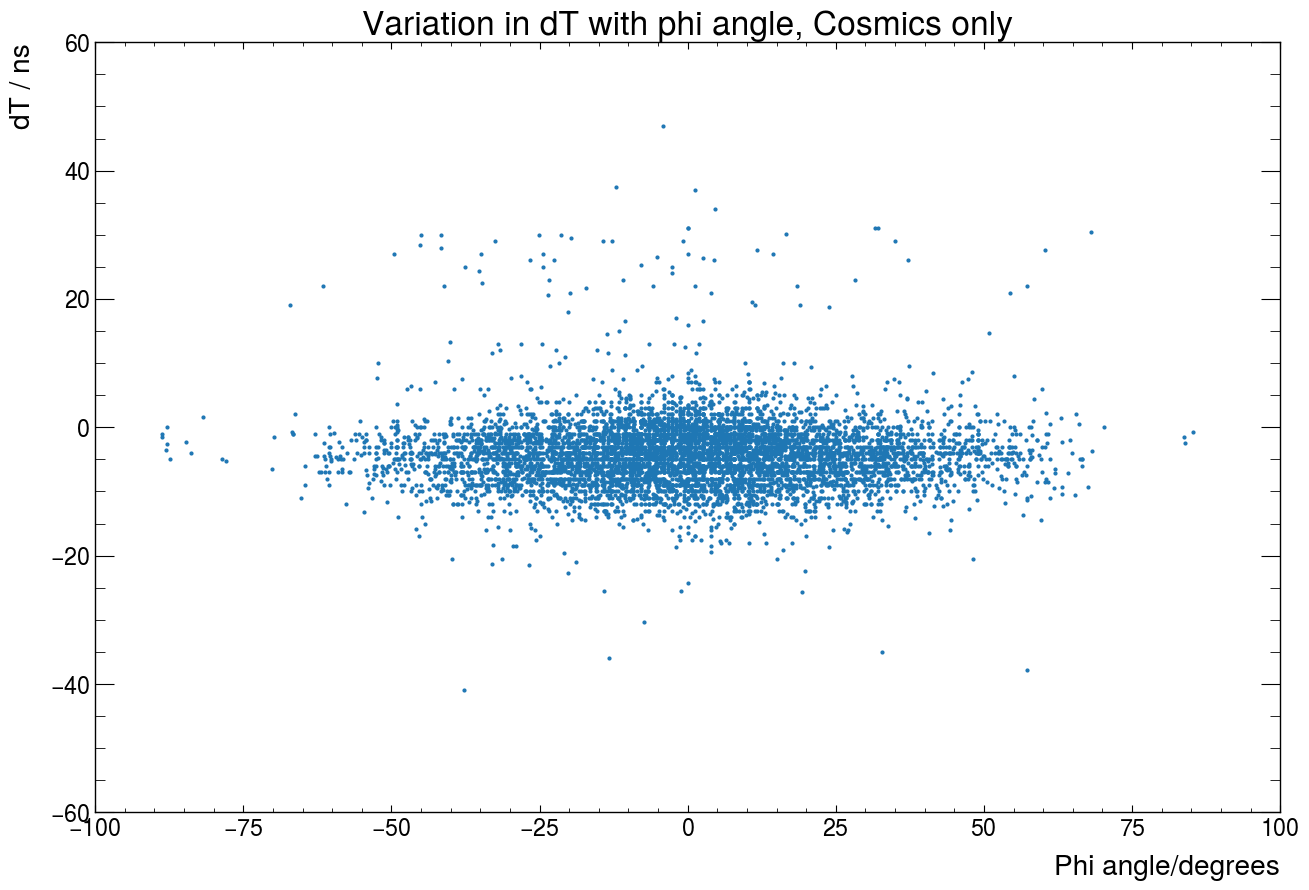

In [62]:
plt.figure(figsize=(15,10))

angles_phi_cosmics_degrees = [x*180/np.pi for x in angles_phi_Cosmics]

# Plotting figure}
plt.scatter(angles_phi_cosmics_degrees, times_delta_cosmics, marker='o', linestyle='-',s=4)

# Adding labels and title
plt.xlabel('Phi angle/degrees')
plt.ylabel('dT / ns')
plt.title('Variation in dT with phi angle, Cosmics only')
# Displaying the plot
plt.show()

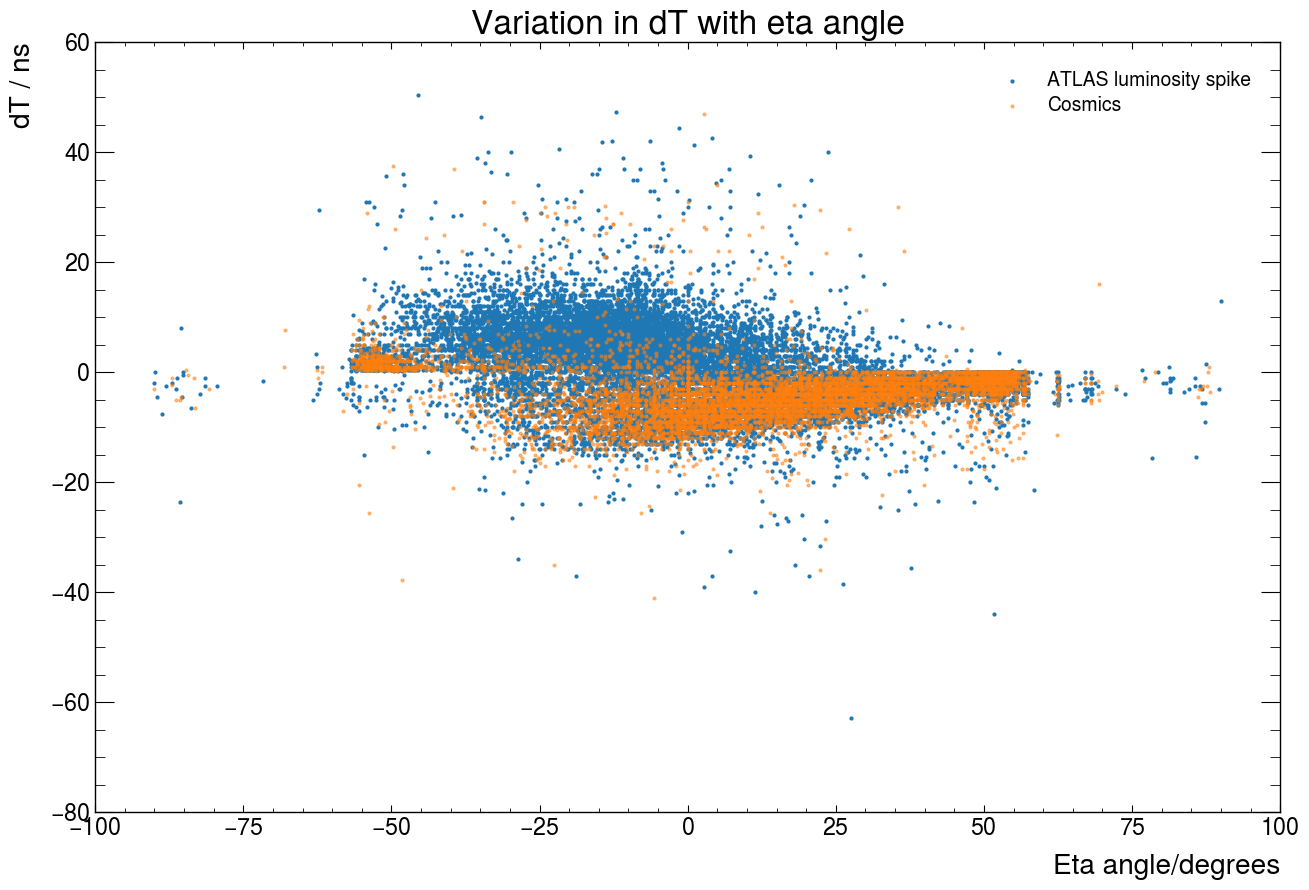

In [69]:
plt.figure(figsize=(15,10))

angles_eta_cosmics_degrees = [x*180/np.pi for x in angles_eta_cosmics]
angles_eta_degrees = [x*180/np.pi for x in angles_eta]

# Plotting figure
plt.scatter(angles_eta_degrees, times_delta, marker='o', linestyle='-', s=4,label='ATLAS luminosity spike')
plt.scatter(angles_eta_cosmics_degrees, times_delta_cosmics, marker='o', linestyle='-',s=4,label='Cosmics',alpha=0.5)


# Adding labels and title
plt.xlabel('Eta angle/degrees')
plt.ylabel('dT / ns')
plt.title('Variation in dT with eta angle')

plt.legend()

# Displaying the plot
plt.show()

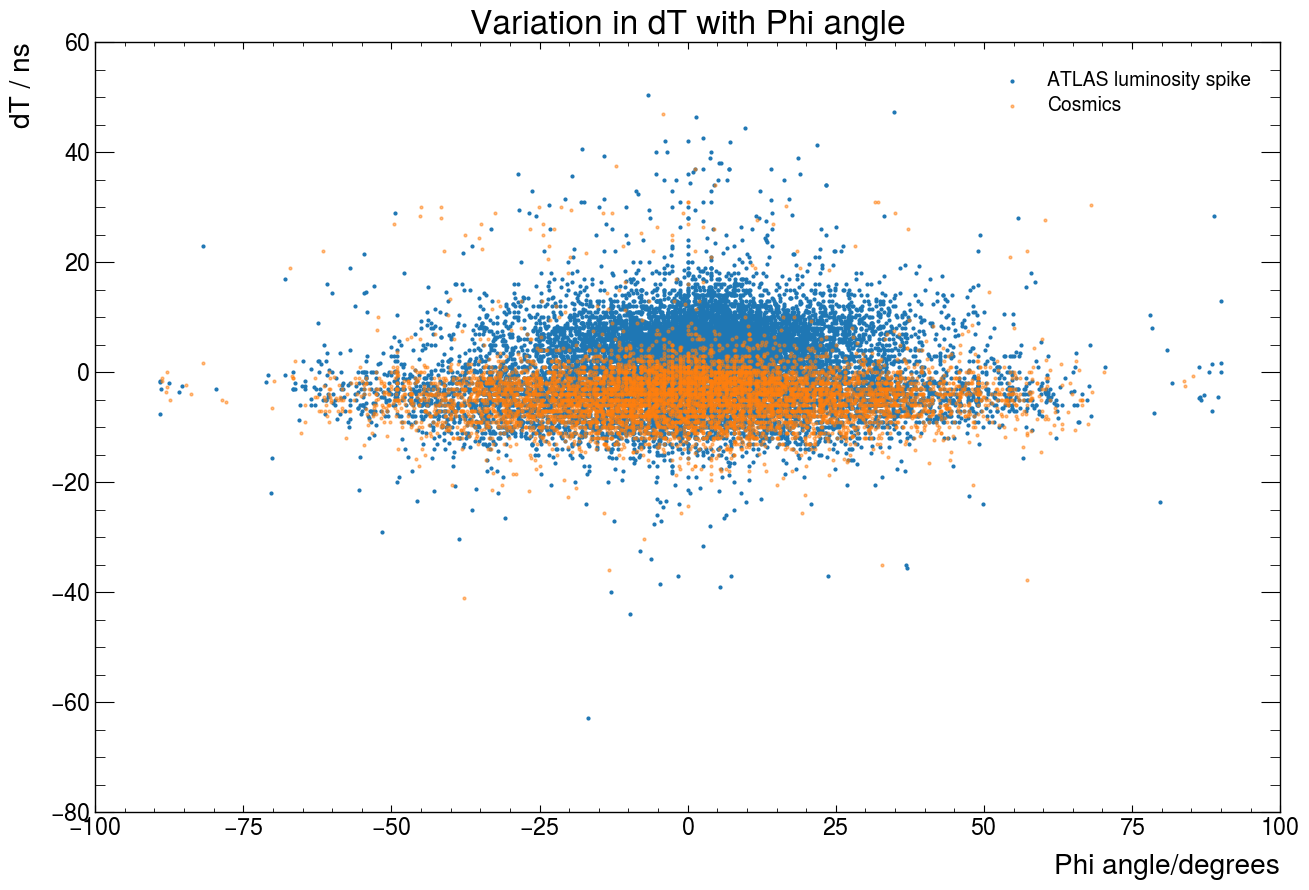

In [70]:
plt.figure(figsize=(15,10))

angles_phi_cosmics_degrees = [x*180/np.pi for x in angles_phi_Cosmics]
angles_phi_degrees = [x*180/np.pi for x in angles_phi]

# Plotting figure
plt.scatter(angles_phi_degrees, times_delta, marker='o', linestyle='-', s=4,label='ATLAS luminosity spike')
plt.scatter(angles_phi_cosmics_degrees, times_delta_cosmics, marker='o', linestyle='-',s=4,label='Cosmics',alpha=0.5)


# Adding labels and title
plt.xlabel('Phi angle/degrees')
plt.ylabel('dT / ns')
plt.title('Variation in dT with Phi angle')

plt.legend()

# Displaying the plot
plt.show()

In [79]:
def plot_angle_distribution_absolute_2(angles1, angles2, title):
    # Flatten the arrays if they are multidimensional
    angles1 = np.asarray(angles1).flatten()
    angles2 = np.asarray(angles2).flatten()

    plt.figure(figsize=(16, 10))

    # Determine the range for the histograms
    angle_range = (-np.pi/2, np.pi/2)  # You can adjust this range based on your data

    # Plot histogram with counts
    plt.hist(angles1, bins=61, range=angle_range, density=False, edgecolor='black',label='ATLAS Luminosity spike, 2 Hours')

    plt.hist(angles2, bins=61, range=angle_range, density=False, edgecolor='black', alpha=0.5, color = 'green', label='Cosmics Only, 2 Hours')


    # Convert radians to degrees for x-ticks
    x_ticks_degrees = np.linspace(-90, 90, num=19)
    x_ticks_radians = np.radians(x_ticks_degrees)

    # Set x-ticks labels and positions
    plt.xticks(x_ticks_radians, x_ticks_degrees)

    # Customize the plot
    plt.xlabel('Angle/ degrees from axis perpendicular to surface of RPCs')
    plt.ylabel('Number of Counts')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

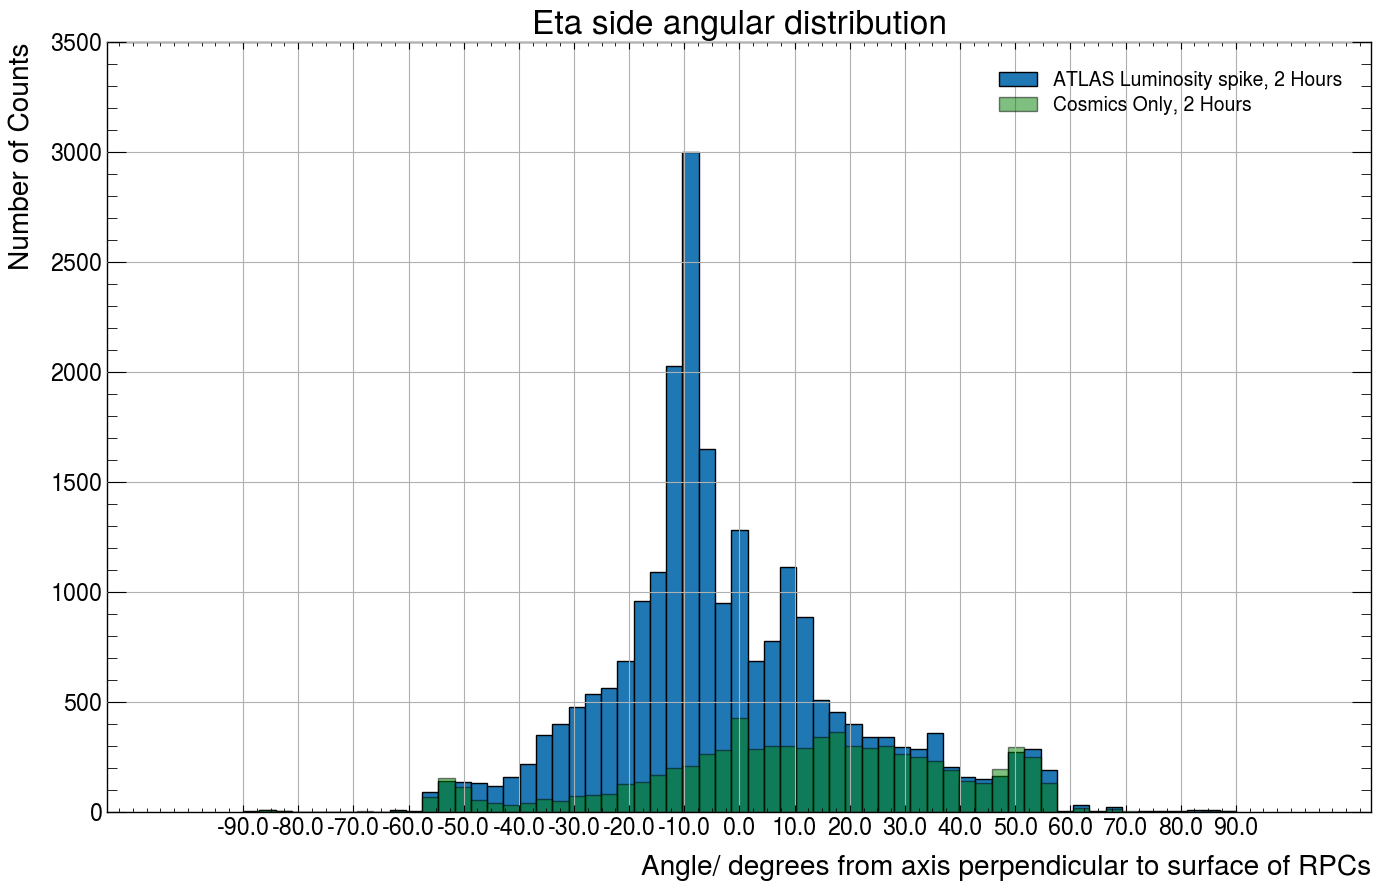

In [81]:
plot_angle_distribution_absolute_2(angles_eta,angles_eta_cosmics,"Eta side angular distribution")

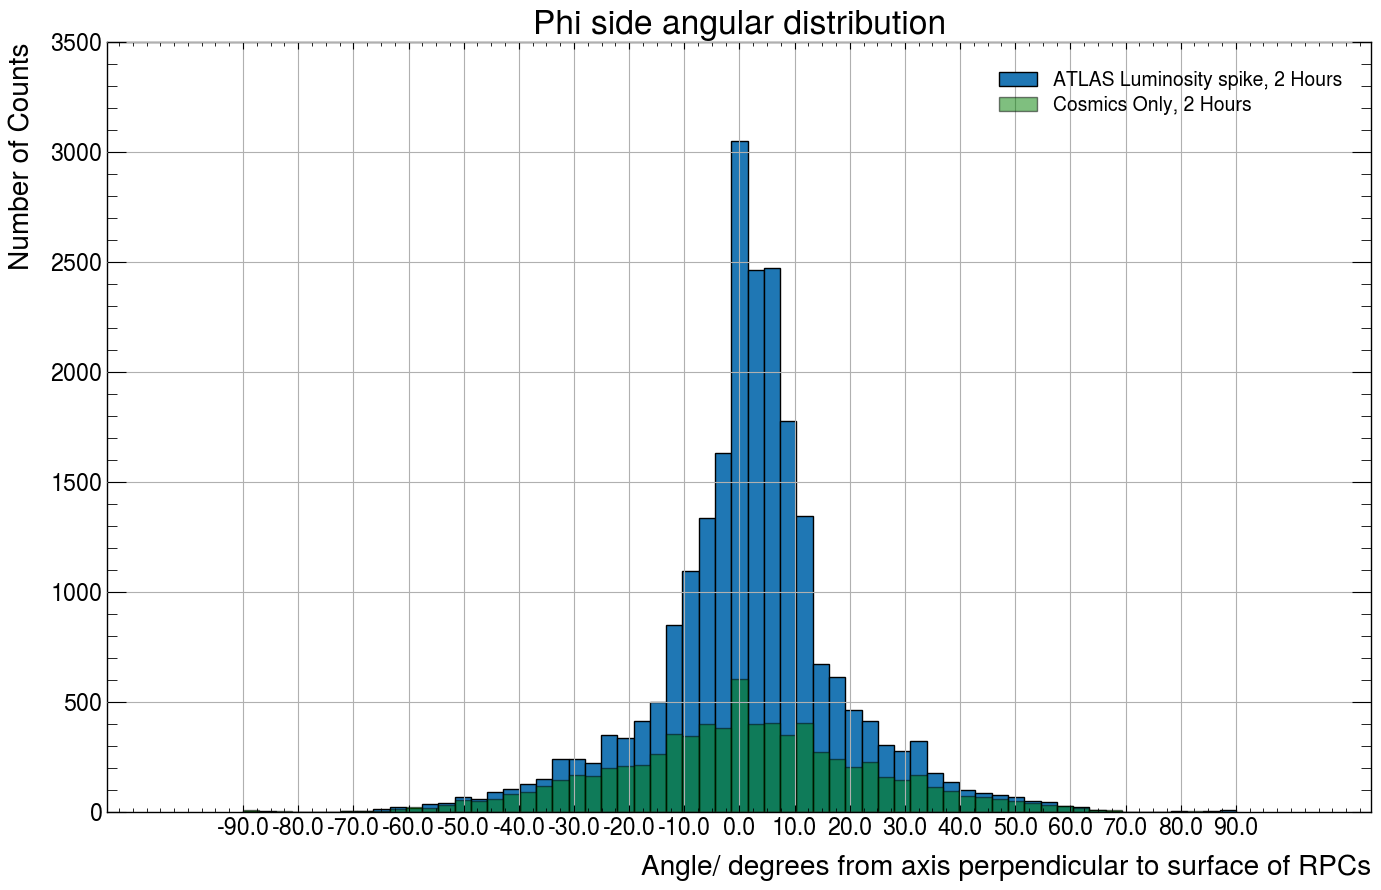

In [82]:
plot_angle_distribution_absolute_2(angles_phi,angles_phi_Cosmics,"Phi side angular distribution")